Combined Mean Slope of $Q_r$ vs $r$ does not cross -1.875 in the given range.
Combined Mean Slope of $Q_{tot}$ vs $r$ does not cross -1.875 in the given range.


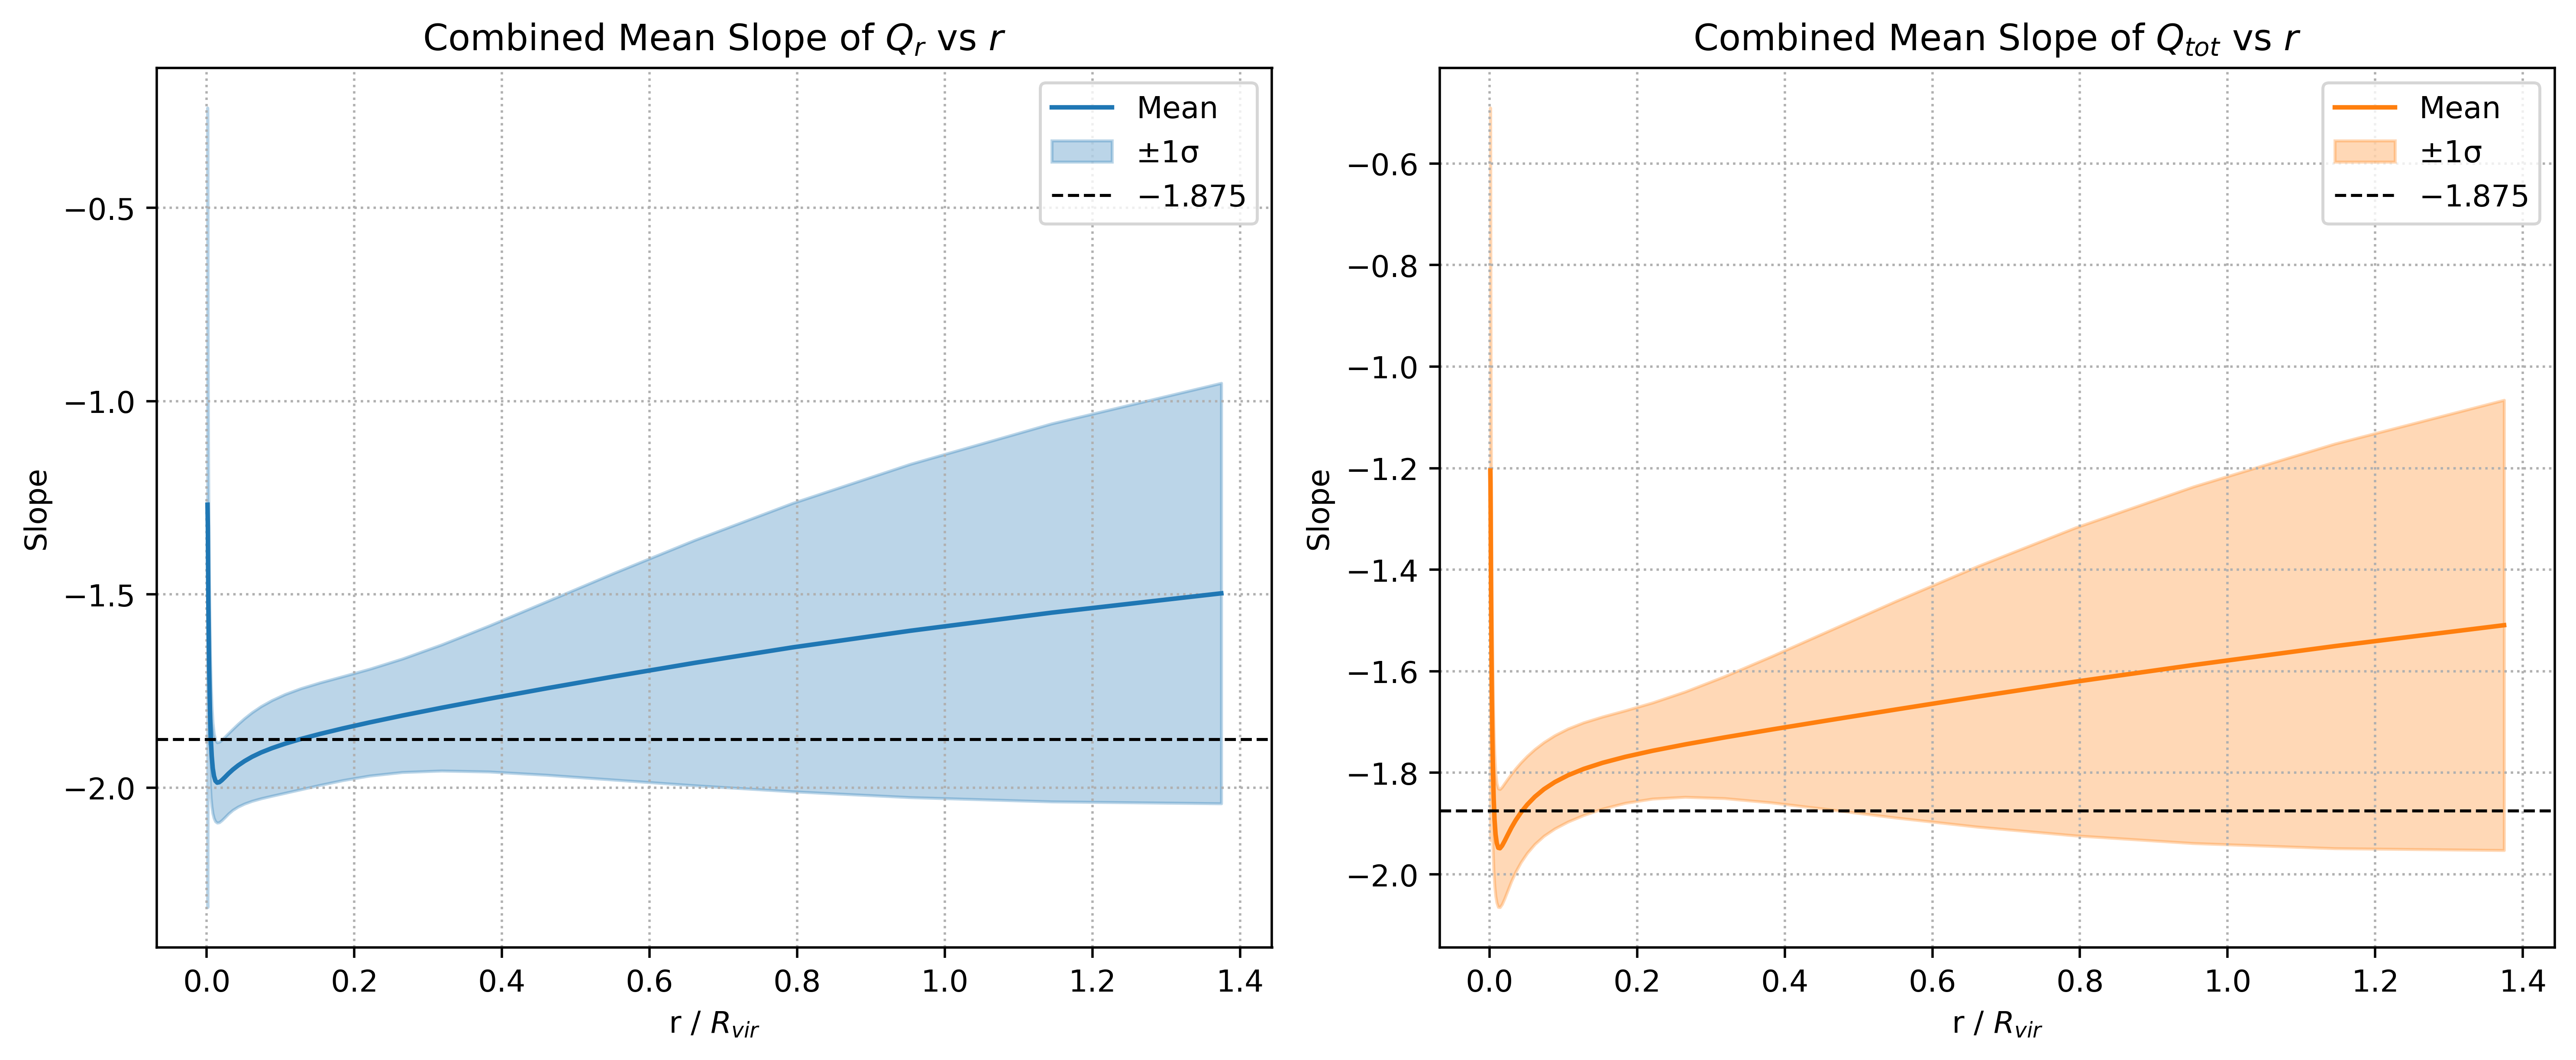

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import brentq

def plot_combined_mean_ppsd_slope_vs_radius(base_dir, suite_names):
    slope_r_all, slope_tot_all, r_grid_ref = [], [], None

    for suite in suite_names:
        slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
        files = sorted([f for f in os.listdir(slope_dir) if f.endswith(".csv")])

        for f in files:
            df = pd.read_csv(os.path.join(slope_dir, f))
            r = df["r_scaled"].values
            s_Qr = df["slope_Q_r"].values
            s_Qtot = df["slope_Q_tot"].values

            if not np.all(np.isfinite(r)) or not np.all(np.isfinite(s_Qr)) or not np.all(np.isfinite(s_Qtot)):
                continue

            if r_grid_ref is None:
                r_grid_ref = r
            if not np.allclose(r, r_grid_ref, rtol=1e-4, atol=1e-6):
                continue  # skip if r_grid inconsistent

            slope_r_all.append(s_Qr)
            slope_tot_all.append(s_Qtot)

    slope_r_all = np.array(slope_r_all)
    slope_tot_all = np.array(slope_tot_all)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=500)
    ax_r, ax_tot = axes

    def plot_mean_with_error(ax, r, data, title, color):
        mean = np.nanmean(data, axis=0)
        std = np.nanstd(data, axis=0)
        ax.set_xscale("linear")
        ax.set_yscale("linear")
        ax.set_xlabel("r / $R_{vir}$")
        ax.set_ylabel("Slope")
        ax.set_title(title)
        ax.plot(r, mean, color=color, label="Mean")
        ax.fill_between(r, mean - std, mean + std, color=color, alpha=0.3, label="±1σ")
        ax.axhline(-1.875, color="black", ls="--", lw=1, label="$-1.875$")
        ax.grid(True, which="both", linestyle=":")
        ax.legend()

        # Interpolate to find crossing point
        try:
            f_interp = interp1d(r, mean - (-1.875), kind="linear", bounds_error=False)
            r_cross = brentq(f_interp, r[0], r[-1])
            ax.axvline(r_cross, color=color, ls=":", lw=1.5)
            print(f"{title} crosses -1.875 at r = {r_cross:.4f} R_vir")
        except ValueError:
            print(f"{title} does not cross -1.875 in the given range.")

    plot_mean_with_error(ax_r, r_grid_ref, slope_r_all, "Combined Mean Slope of $Q_r$ vs $r$", "tab:blue")
    plot_mean_with_error(ax_tot, r_grid_ref, slope_tot_all, "Combined Mean Slope of $Q_{tot}$ vs $r$", "tab:orange")

    plt.tight_layout()
    plt.show()

base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup",
          "SymphonyLCluster", "SymphonyCluster"]
plot_combined_mean_ppsd_slope_vs_radius(base_dir, suite_names)

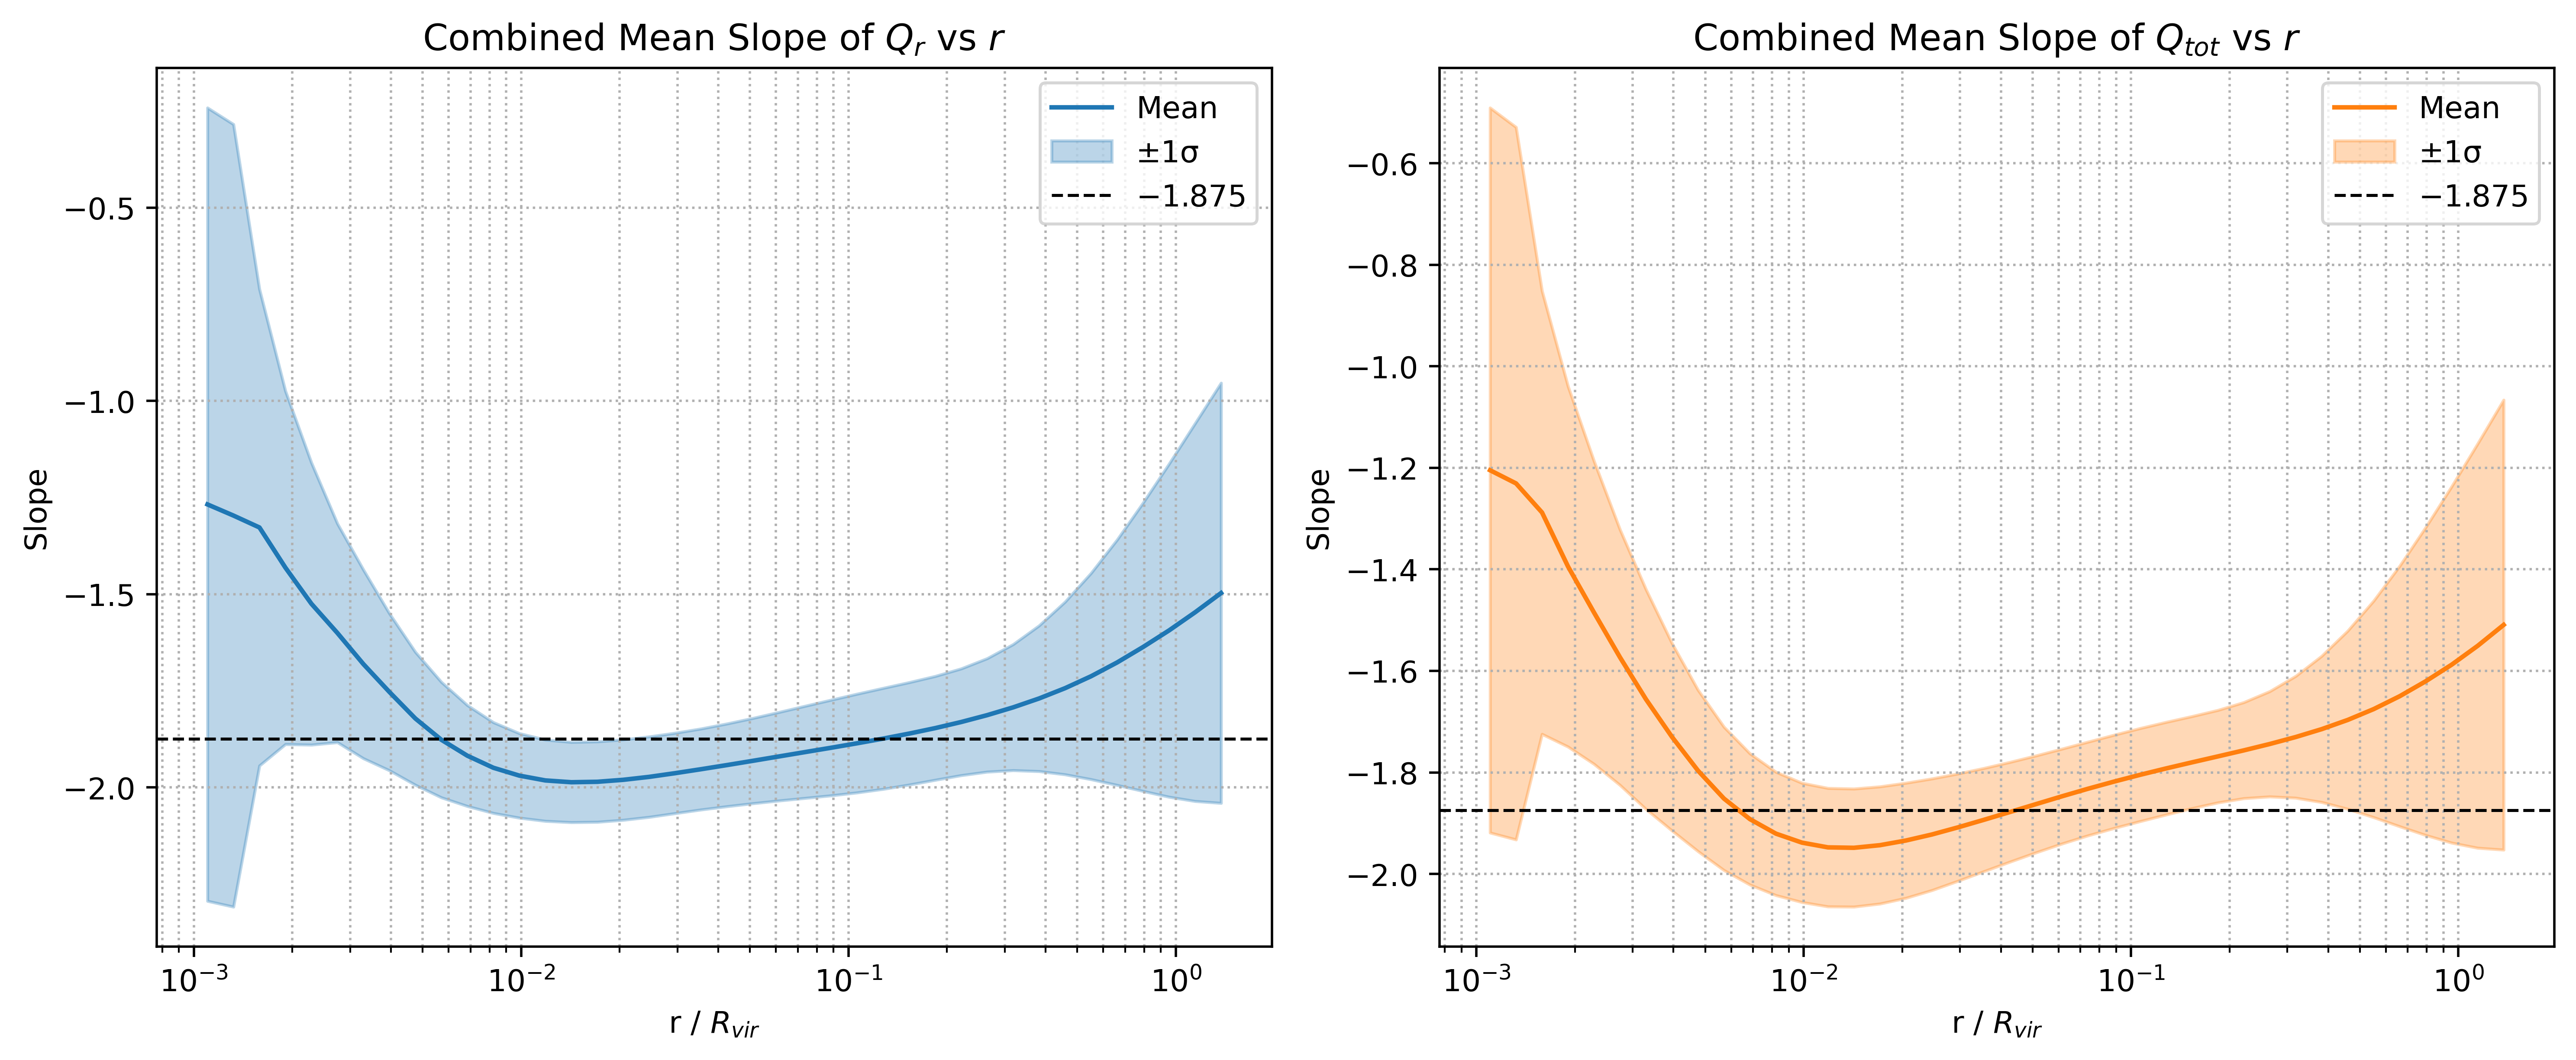

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_combined_mean_ppsd_slope_vs_radius(base_dir, suite_names):
    slope_r_all, slope_tot_all, r_grid_ref = [], [], None

    for suite in suite_names:
        slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
        files = sorted([f for f in os.listdir(slope_dir) if f.endswith(".csv")])

        for f in files:
            df = pd.read_csv(os.path.join(slope_dir, f))
            r = df["r_scaled"].values
            s_Qr = df["slope_Q_r"].values
            s_Qtot = df["slope_Q_tot"].values

            if not np.all(np.isfinite(r)) or not np.all(np.isfinite(s_Qr)) or not np.all(np.isfinite(s_Qtot)):
                continue

            if r_grid_ref is None:
                r_grid_ref = r
            if not np.allclose(r, r_grid_ref, rtol=1e-4, atol=1e-6):
                continue  # skip if r_grid inconsistent

            slope_r_all.append(s_Qr)
            slope_tot_all.append(s_Qtot)

    slope_r_all = np.array(slope_r_all)
    slope_tot_all = np.array(slope_tot_all)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=500)
    ax_r, ax_tot = axes

    def plot_mean_with_error(ax, r, data, title, color):
        mean = np.nanmean(data, axis=0)
        std = np.nanstd(data, axis=0)
        ax.set_xscale("log")
        ax.set_xlabel("r / $R_{vir}$")
        ax.set_ylabel("Slope")
        ax.set_title(title)
        ax.plot(r, mean, color=color, label="Mean")
        ax.fill_between(r, mean - std, mean + std, color=color, alpha=0.3, label="±1σ")
        ax.axhline(-1.875, color="black", ls="--", lw=1, label="$-1.875$")
        ax.grid(True, which="both", linestyle=":")
        ax.legend()

    plot_mean_with_error(ax_r, r_grid_ref, slope_r_all, "Combined Mean Slope of $Q_r$ vs $r$", "tab:blue")
    plot_mean_with_error(ax_tot, r_grid_ref, slope_tot_all, "Combined Mean Slope of $Q_{tot}$ vs $r$", "tab:orange")

    plt.tight_layout()
    plt.show()

base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup",
          "SymphonyLCluster", "SymphonyCluster"]
plot_combined_mean_ppsd_slope_vs_radius(base_dir, suite_names)

In [8]:
import os
import numpy as np
import pandas as pd

def get_mean_concentration_across_suites(base_dir, suite_names):
    c_list = []

    for suite in suite_names:
        c_path = os.path.join(base_dir, "output", suite, "halo_concentrations.csv")
        if not os.path.exists(c_path):
            print(f"Warning: File not found for {suite}: {c_path}")
            continue
        df = pd.read_csv(c_path)
        if "cvir" not in df.columns:
            print(f"Warning: No 'cvir' column in {suite}")
            continue
        cvals = pd.to_numeric(df["cvir"], errors='coerce')
        cvals = cvals[np.isfinite(cvals)]
        c_list.append(cvals)

    if not c_list:
        return np.nan

    c_all = np.concatenate(c_list)
    return np.mean(c_all)

mean_c = get_mean_concentration_across_suites(base_dir, suite_names)
print(f"Mean concentration across all suites: {mean_c:.3f}")

Mean concentration across all suites: 8.315


Custom fit γ_Q(r) = -(a + b / (1 + c r)) (r ∈ [0.01, 1])
  a = 1.3404
  b = 0.6454
  c = 1.4380
  Slope at r=0.01 ≈ -1.9767
  Slope at r=1.0  ≈ -1.6051


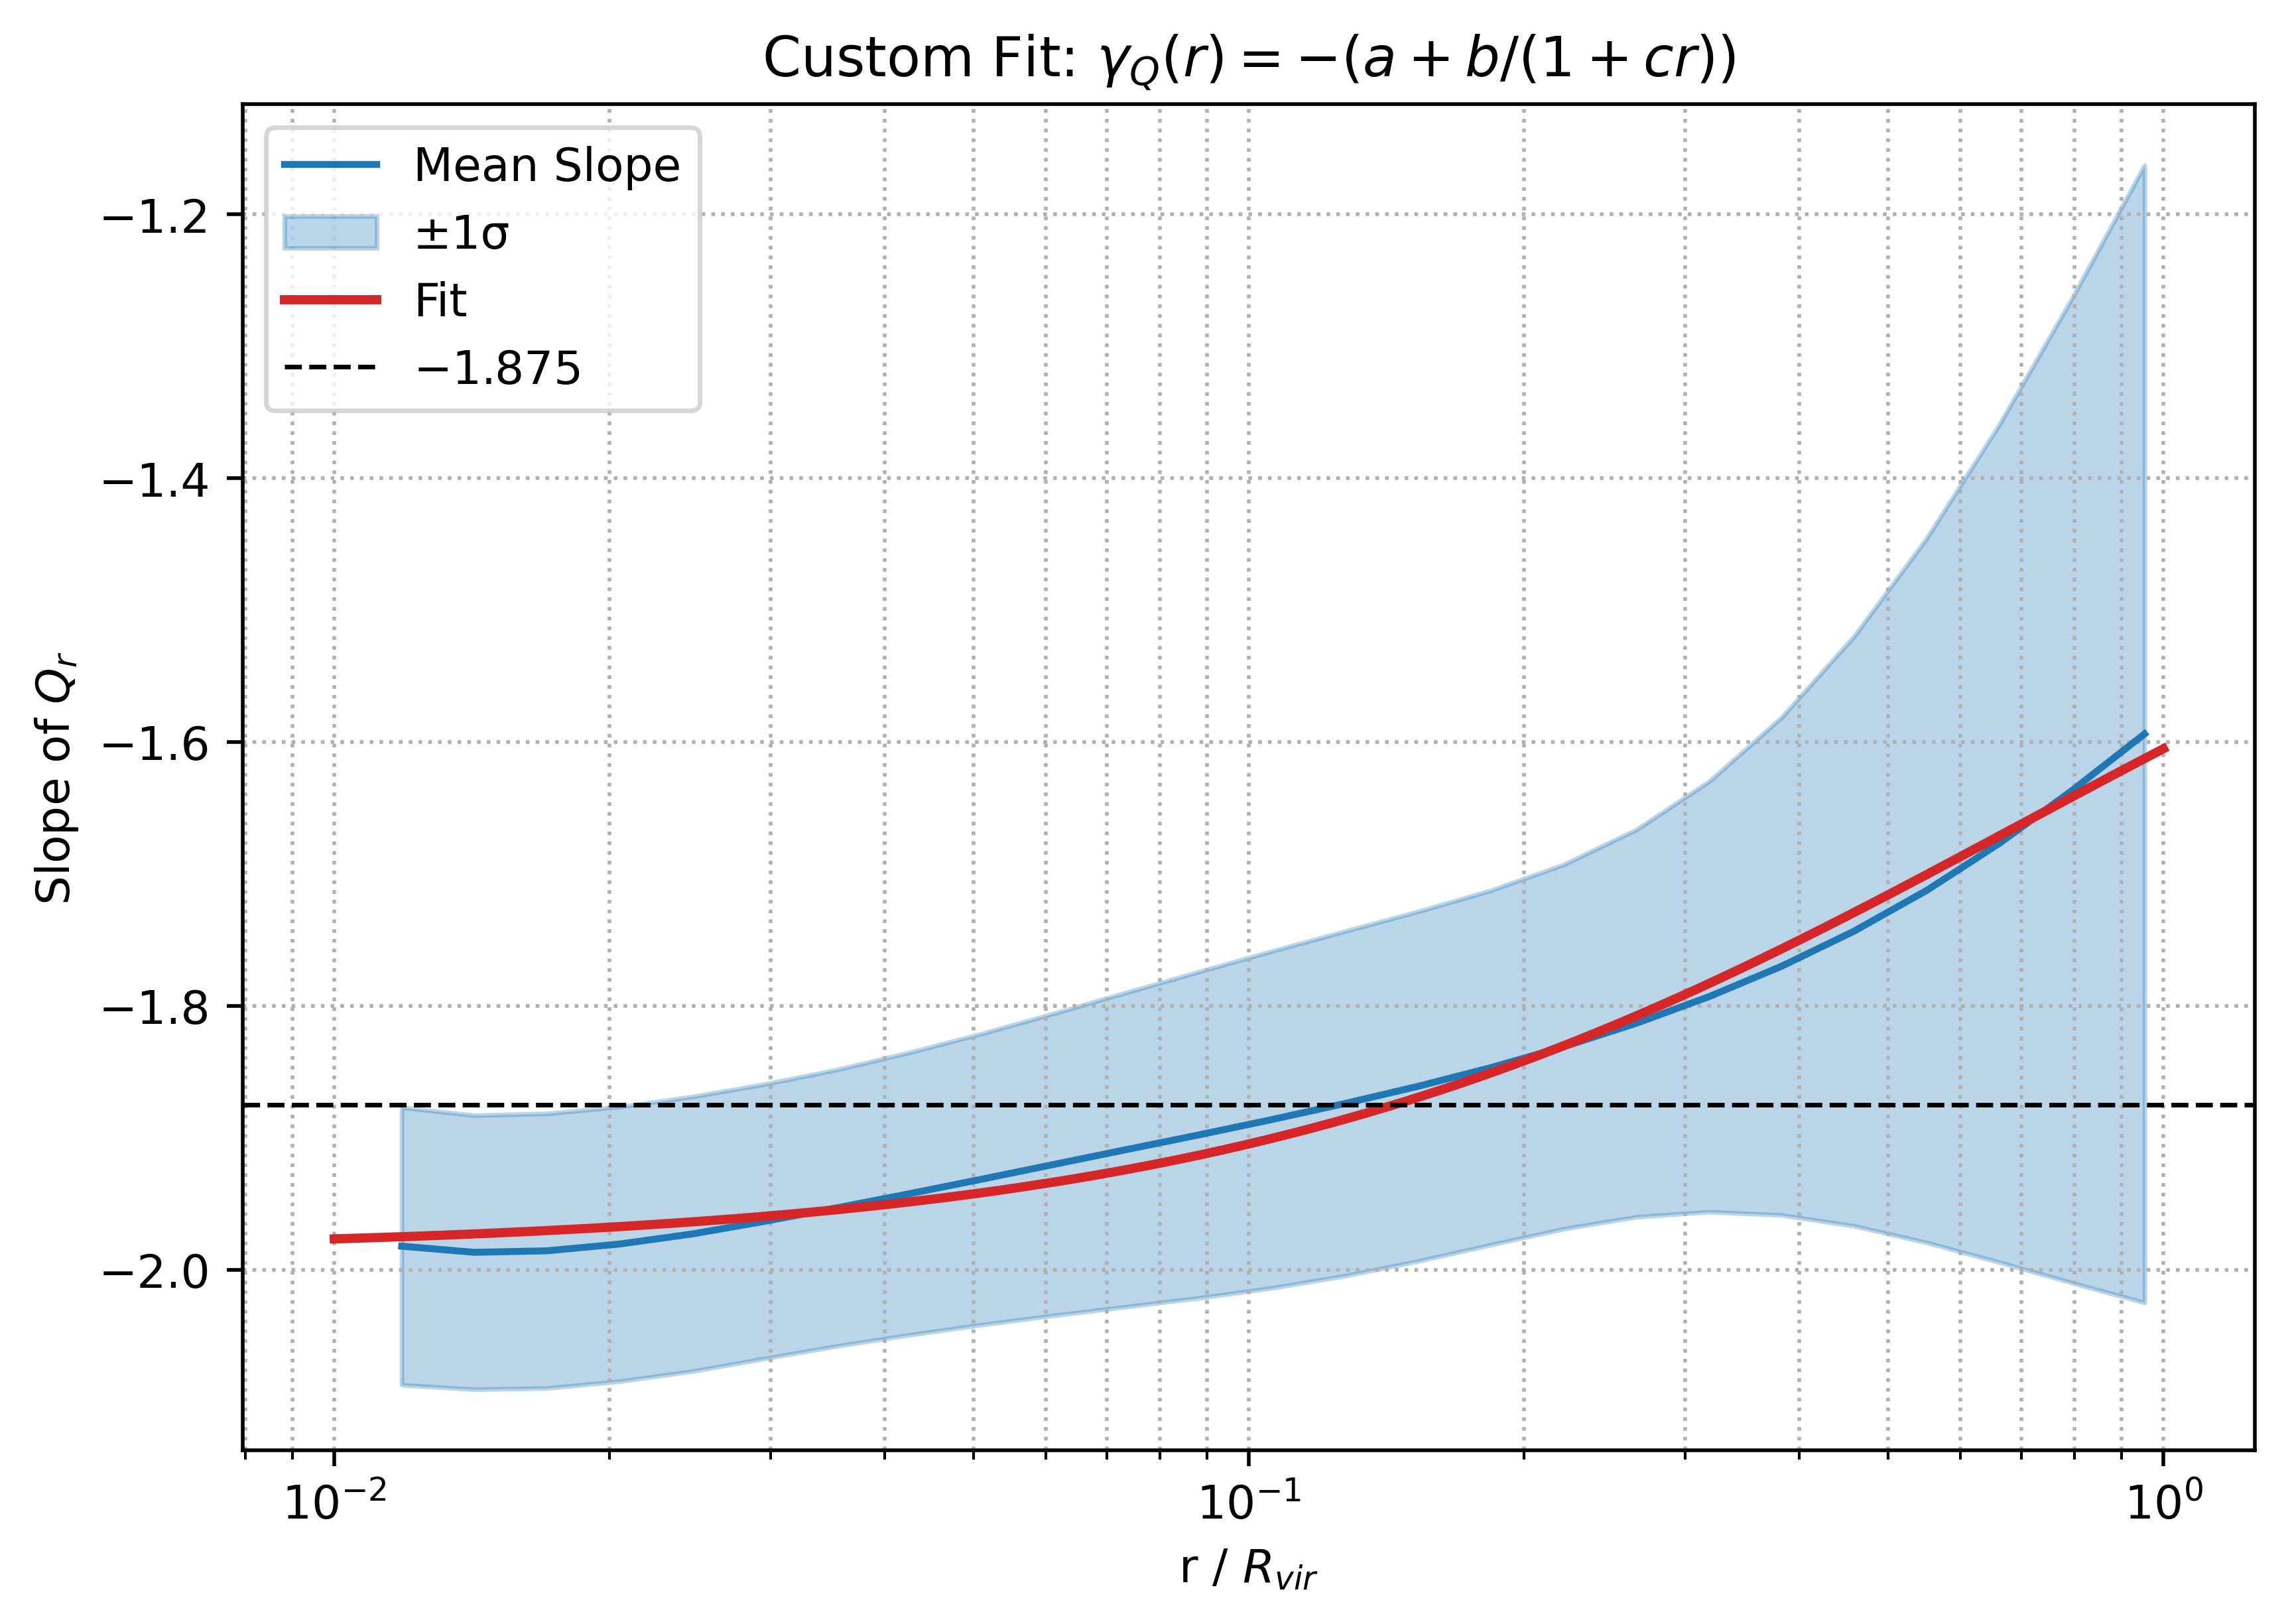

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gamma_Q_model(r, a, b, c):
    return -(a + b / (1 + c * r))

def fit_and_plot_custom_gamma_Q(base_dir, suite_names):
    slope_r_all, r_grid_ref = [], None

    for suite in suite_names:
        slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
        files = sorted([f for f in os.listdir(slope_dir) if f.endswith(".csv")])

        for f in files:
            df = pd.read_csv(os.path.join(slope_dir, f))
            r = df["r_scaled"].values
            s_Qr = df["slope_Q_r"].values

            if not np.all(np.isfinite(r)) or not np.all(np.isfinite(s_Qr)):
                continue

            if r_grid_ref is None:
                r_grid_ref = r
            if not np.allclose(r, r_grid_ref, rtol=1e-4, atol=1e-6):
                continue

            slope_r_all.append(s_Qr)

    slope_r_all = np.array(slope_r_all)
    r = r_grid_ref
    mean_slope = np.nanmean(slope_r_all, axis=0)
    std_slope = np.nanstd(slope_r_all, axis=0)

    # Restrict to r ∈ [0.01, 1]
    mask = (r >= 0.01) & (r <= 1.0) & np.isfinite(mean_slope)
    r_fit = r[mask]
    y_fit = mean_slope[mask]
    std_fit = std_slope[mask]

    # Fit the model
    popt, pcov = curve_fit(gamma_Q_model, r_fit, y_fit, p0=[1.5, 0.4, 10.0], bounds=(0, np.inf))
    a_fit, b_fit, c_fit = popt

    print("Custom fit γ_Q(r) = -(a + b / (1 + c r)) (r ∈ [0.01, 1])")
    print(f"  a = {a_fit:.4f}")
    print(f"  b = {b_fit:.4f}")
    print(f"  c = {c_fit:.4f}")
    print(f"  Slope at r=0.01 ≈ {gamma_Q_model(0.01, *popt):.4f}")
    print(f"  Slope at r=1.0  ≈ {gamma_Q_model(1.0, *popt):.4f}")

    # Plotting
    plt.figure(figsize=(7, 5), dpi=500)
    plt.xscale("log")
    plt.xlabel("r / $R_{vir}$")
    plt.ylabel("Slope of $Q_r$")
    plt.title("Custom Fit: $\\gamma_Q(r) = -(a + b / (1 + c r))$")
    plt.plot(r_fit, y_fit, color="tab:blue", label="Mean Slope")
    plt.fill_between(r_fit, y_fit - std_fit, y_fit + std_fit, color="tab:blue", alpha=0.3, label="±1σ")

    r_dense = np.logspace(np.log10(0.01), np.log10(1.0), 500)
    fitted_curve = gamma_Q_model(r_dense, *popt)
    plt.plot(r_dense, fitted_curve, color="tab:red", lw=2, ls="-", label="Fit")
    plt.axhline(-1.875, color="black", ls="--", lw=1, label="$-1.875$")

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run
base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]
fit_and_plot_custom_gamma_Q(base_dir, suite_names)


▶ Processing suite: SymphonyLMC


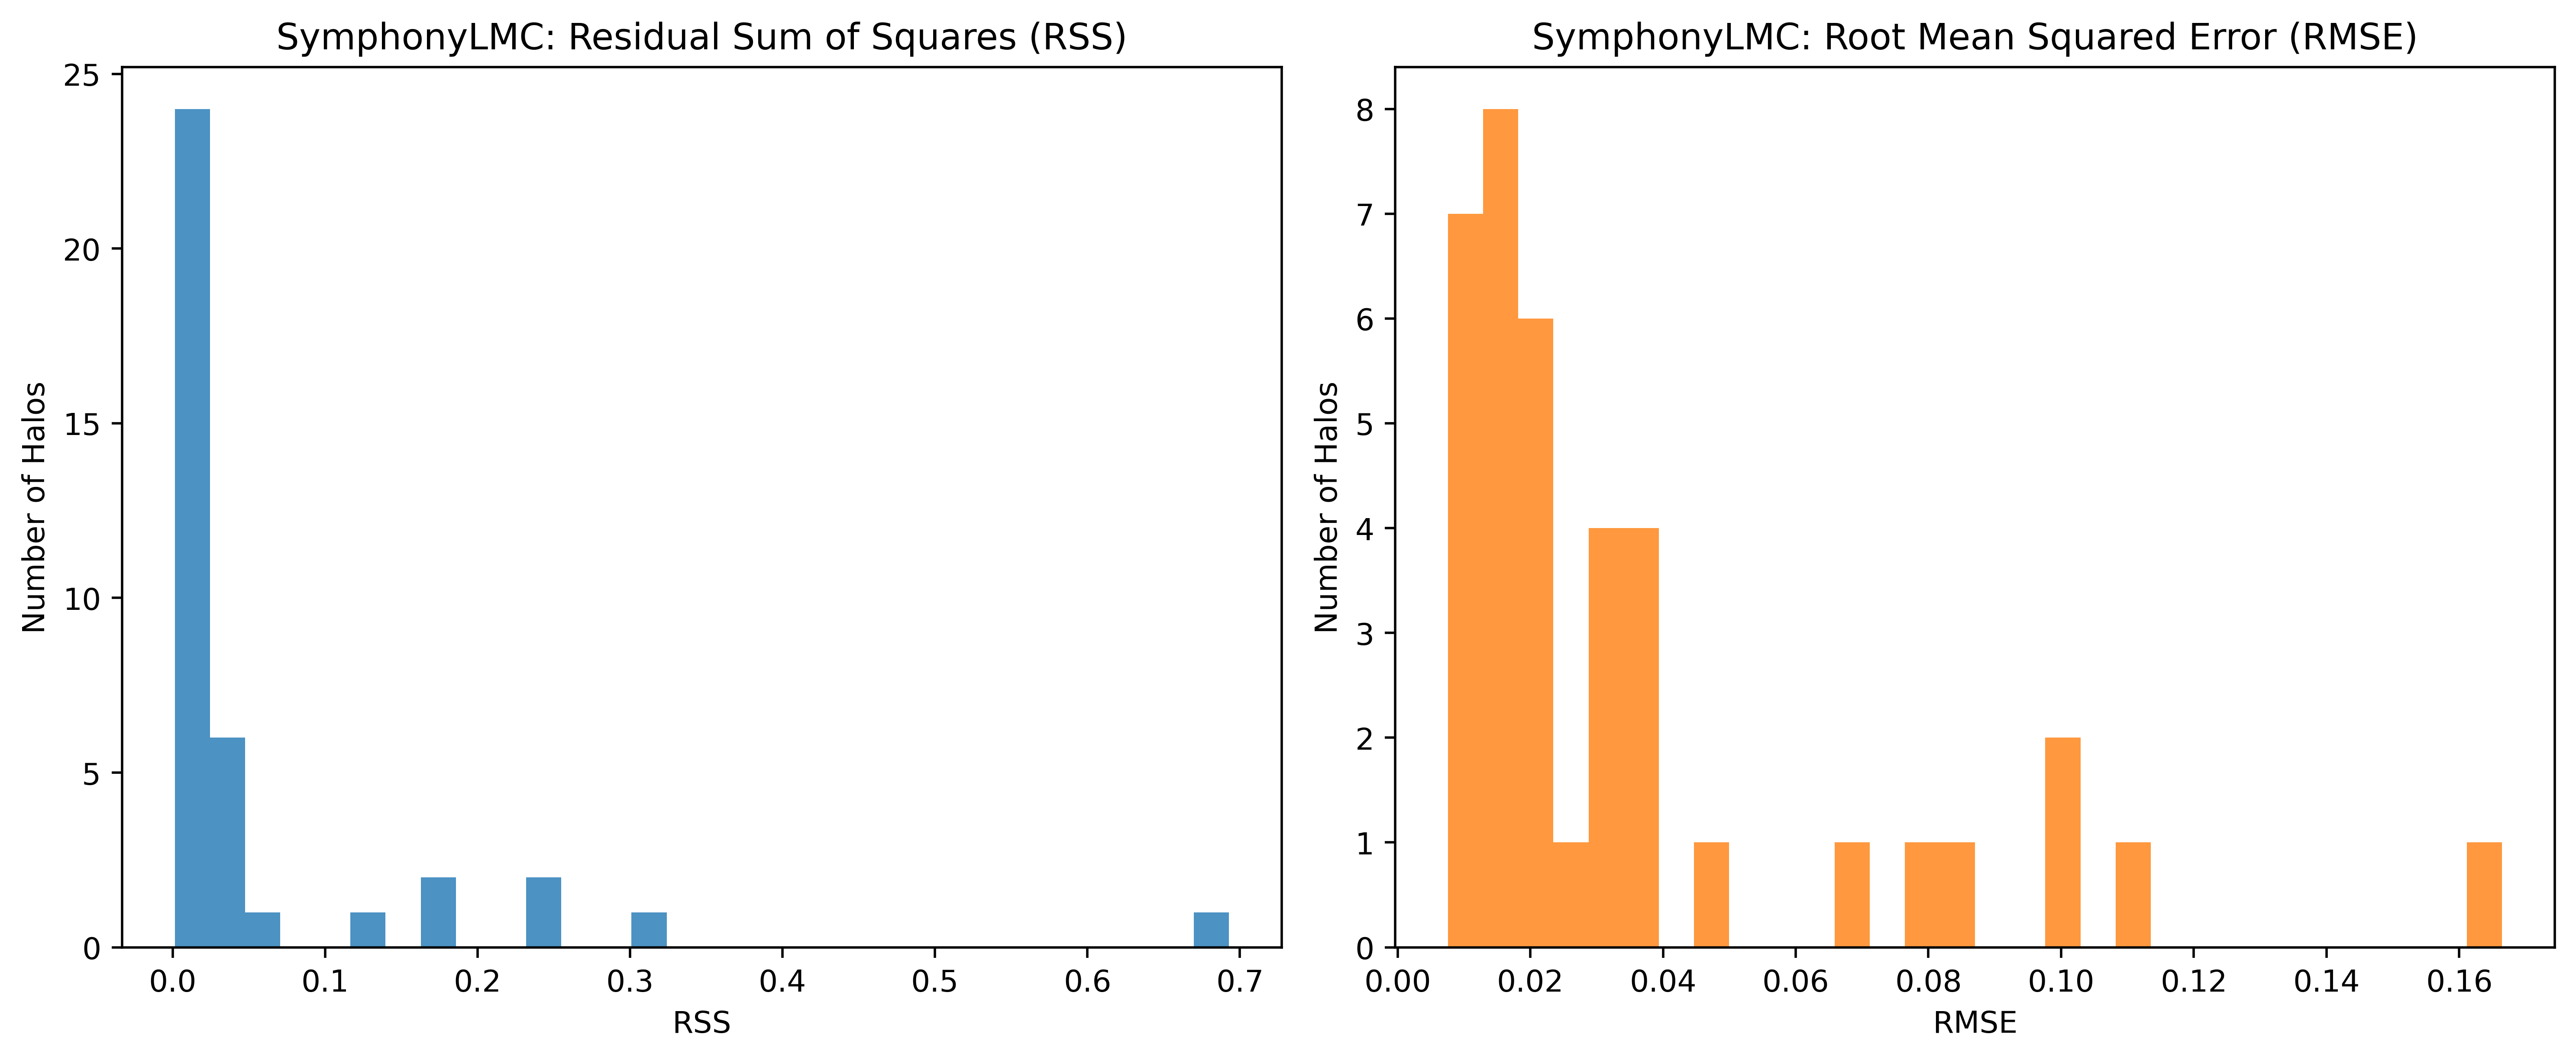


▶ Processing suite: SymphonyMilkyWay


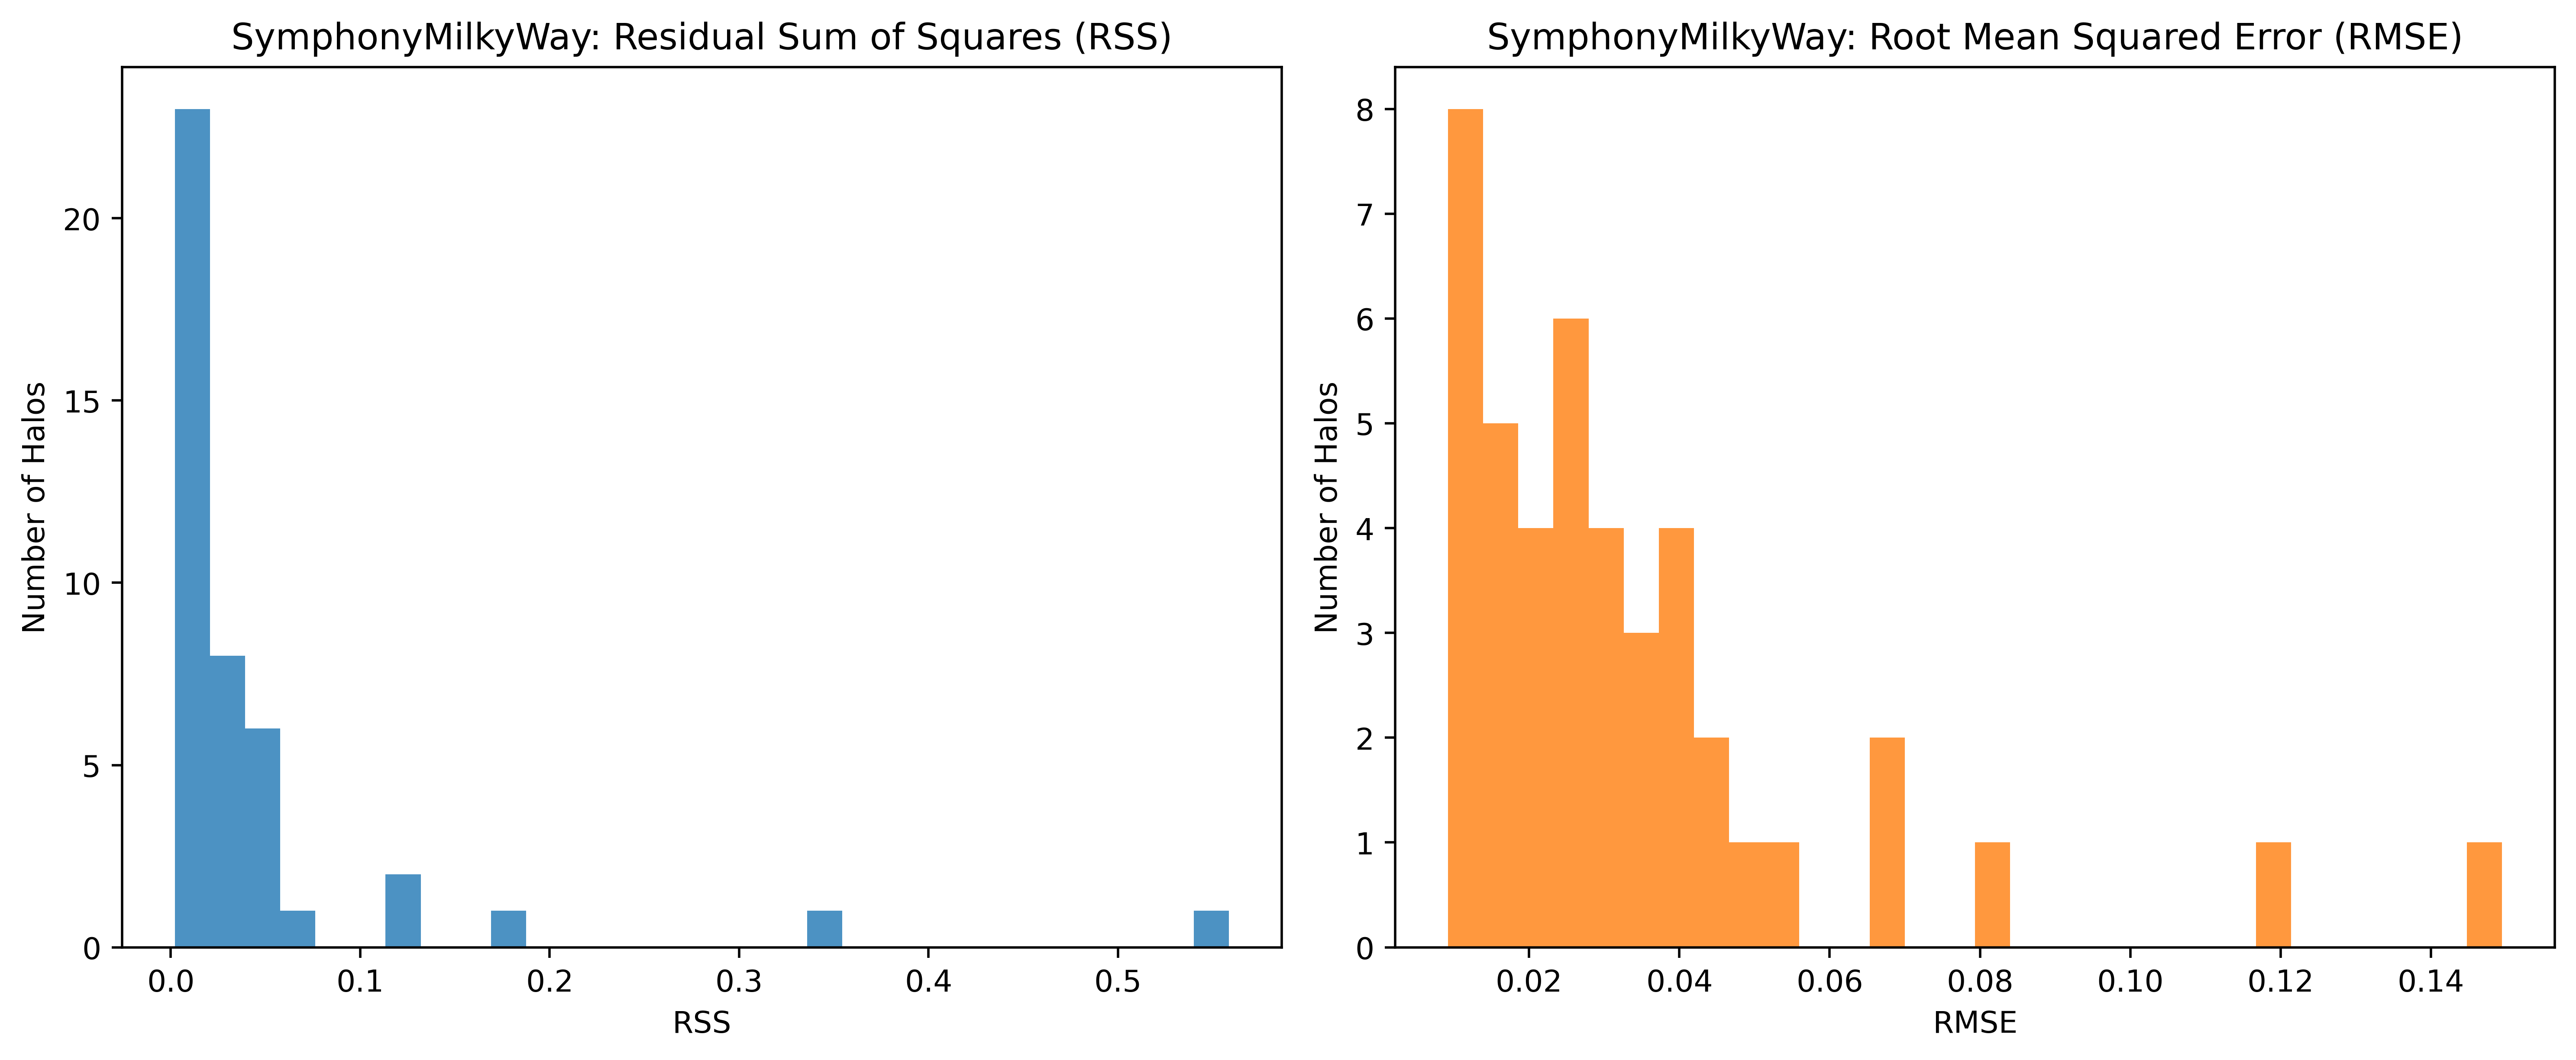


▶ Processing suite: SymphonyGroup


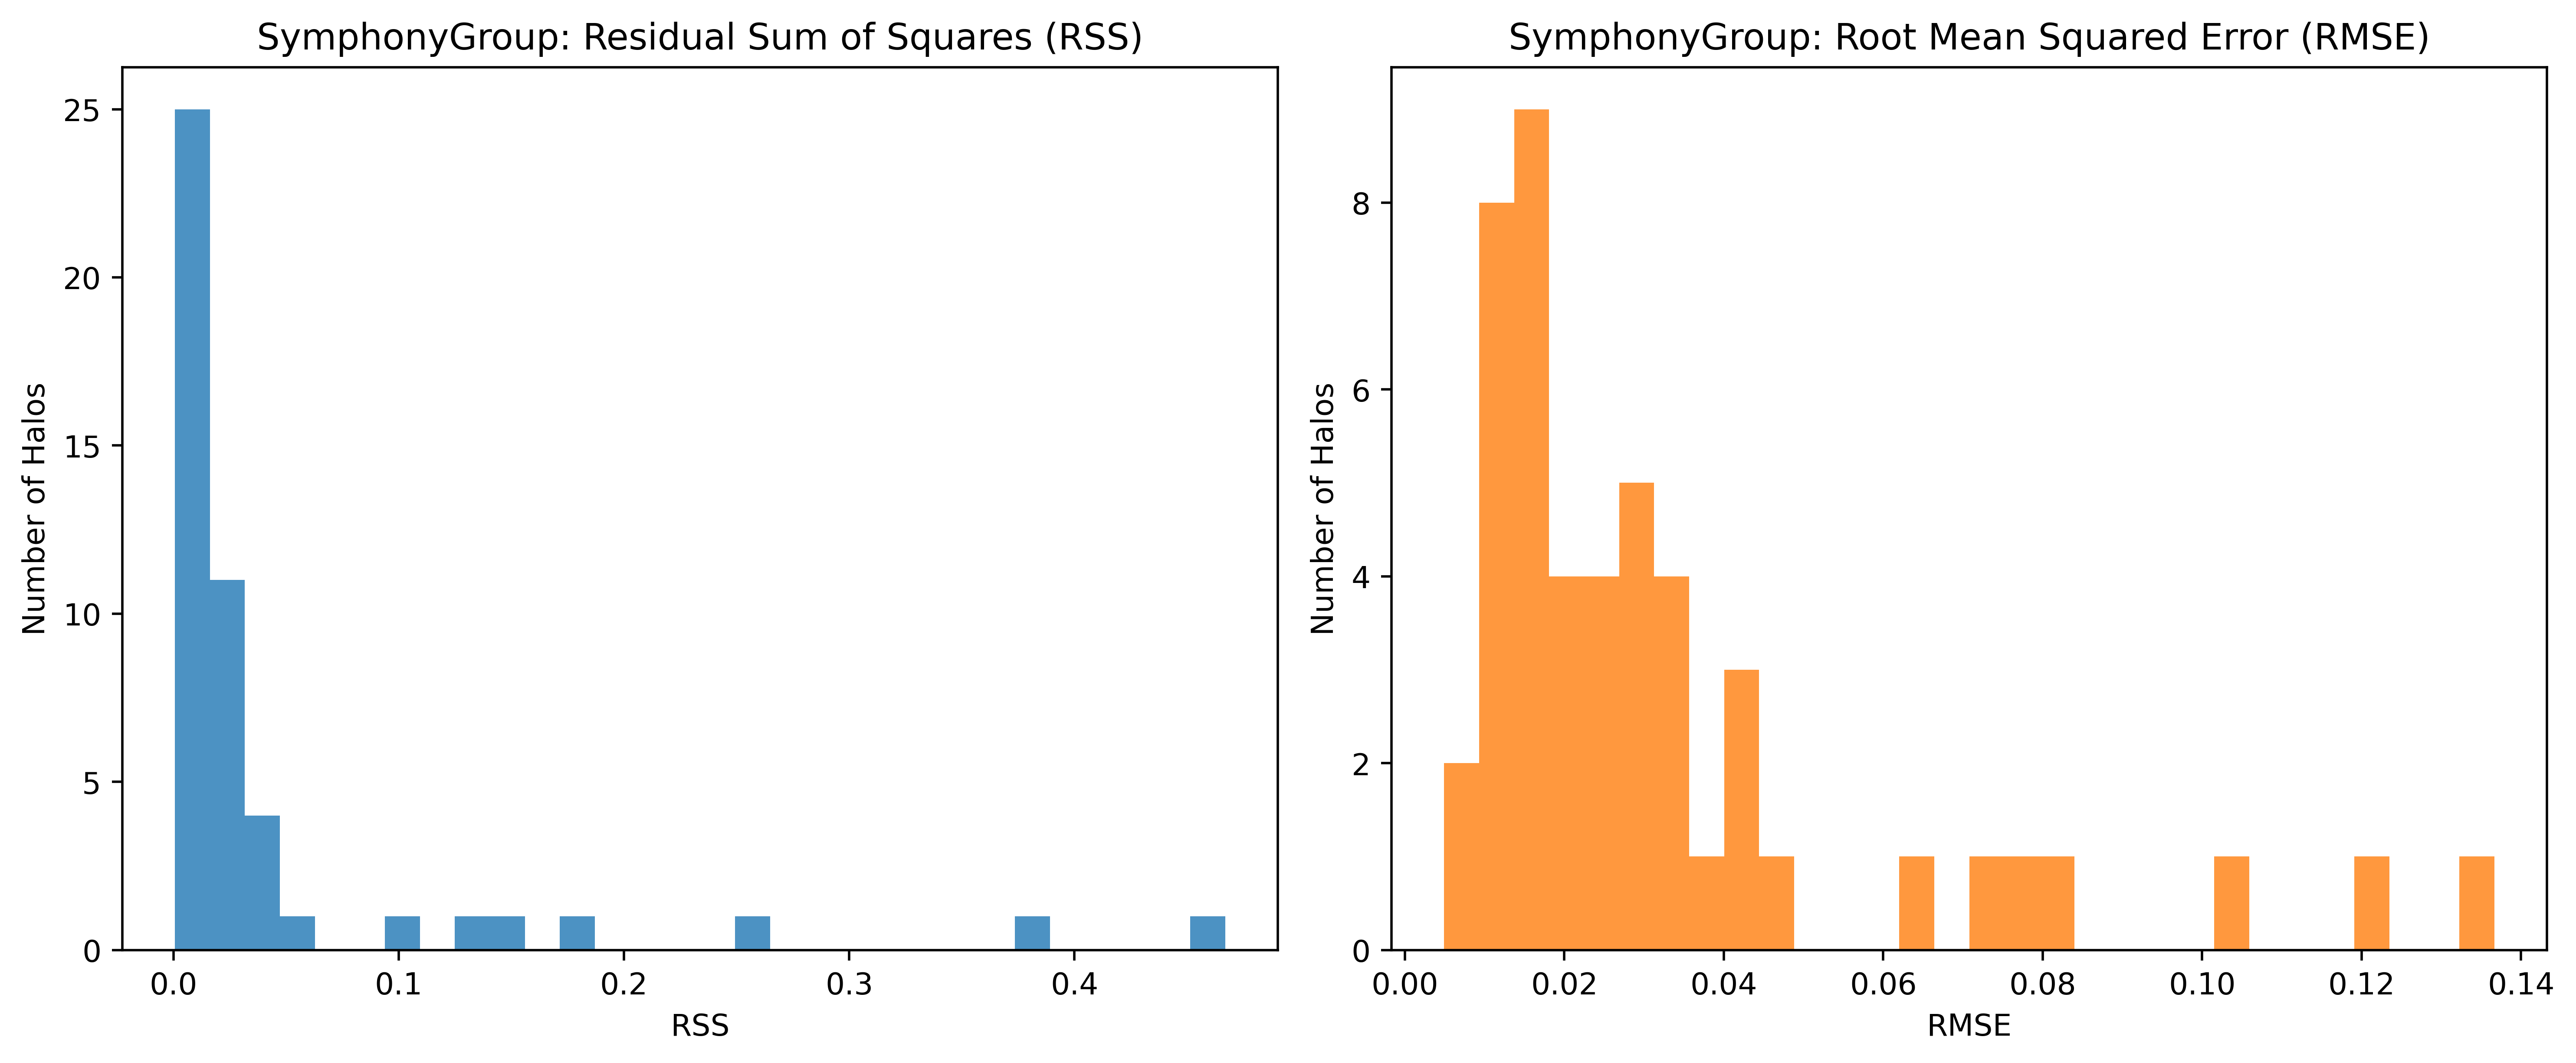


▶ Processing suite: SymphonyLCluster


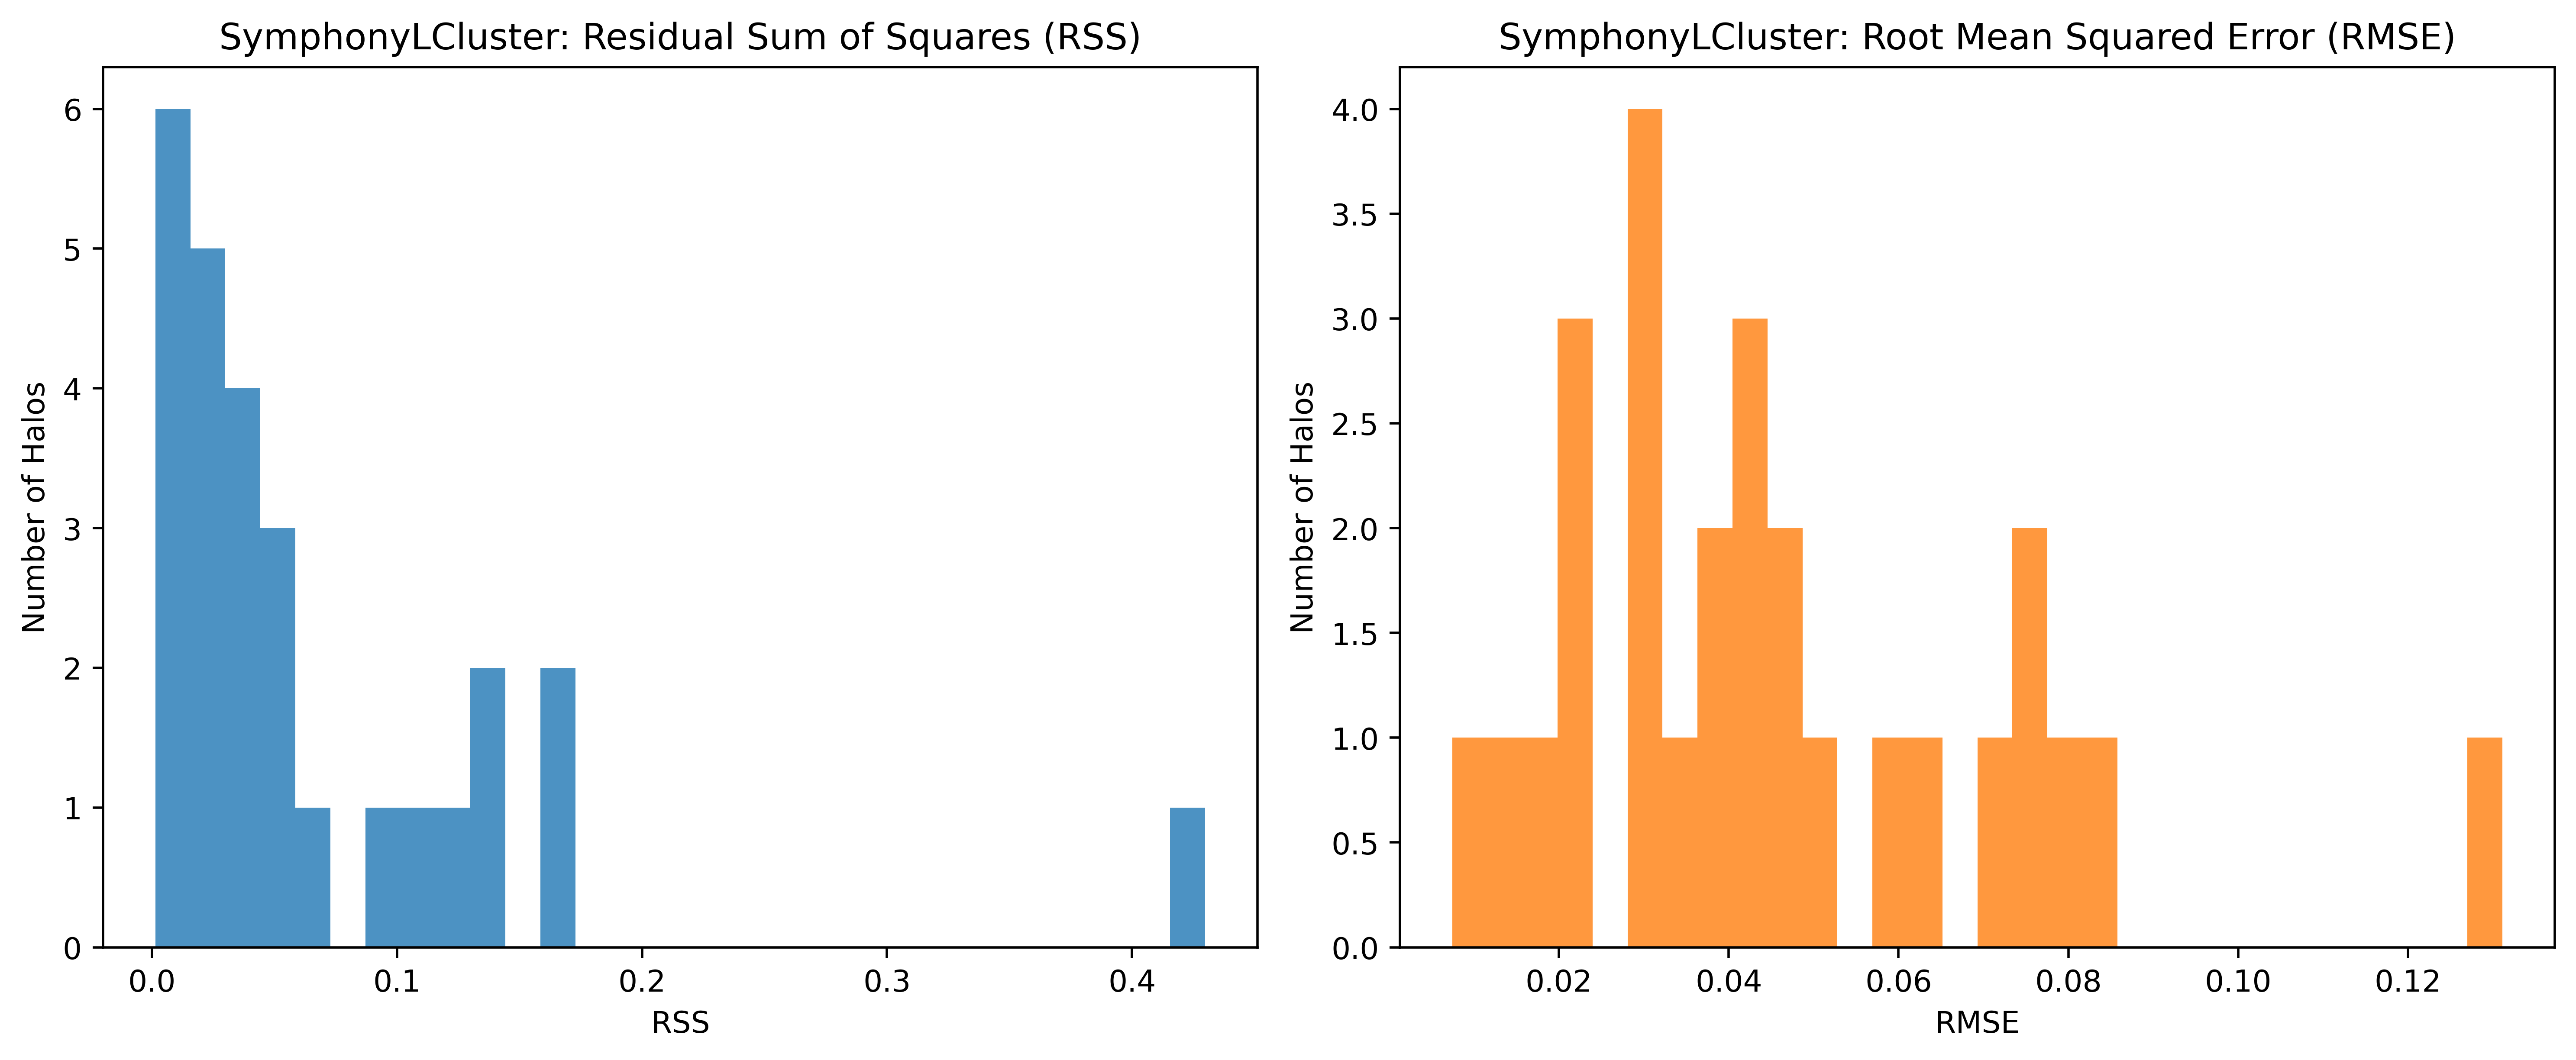


▶ Processing suite: SymphonyCluster


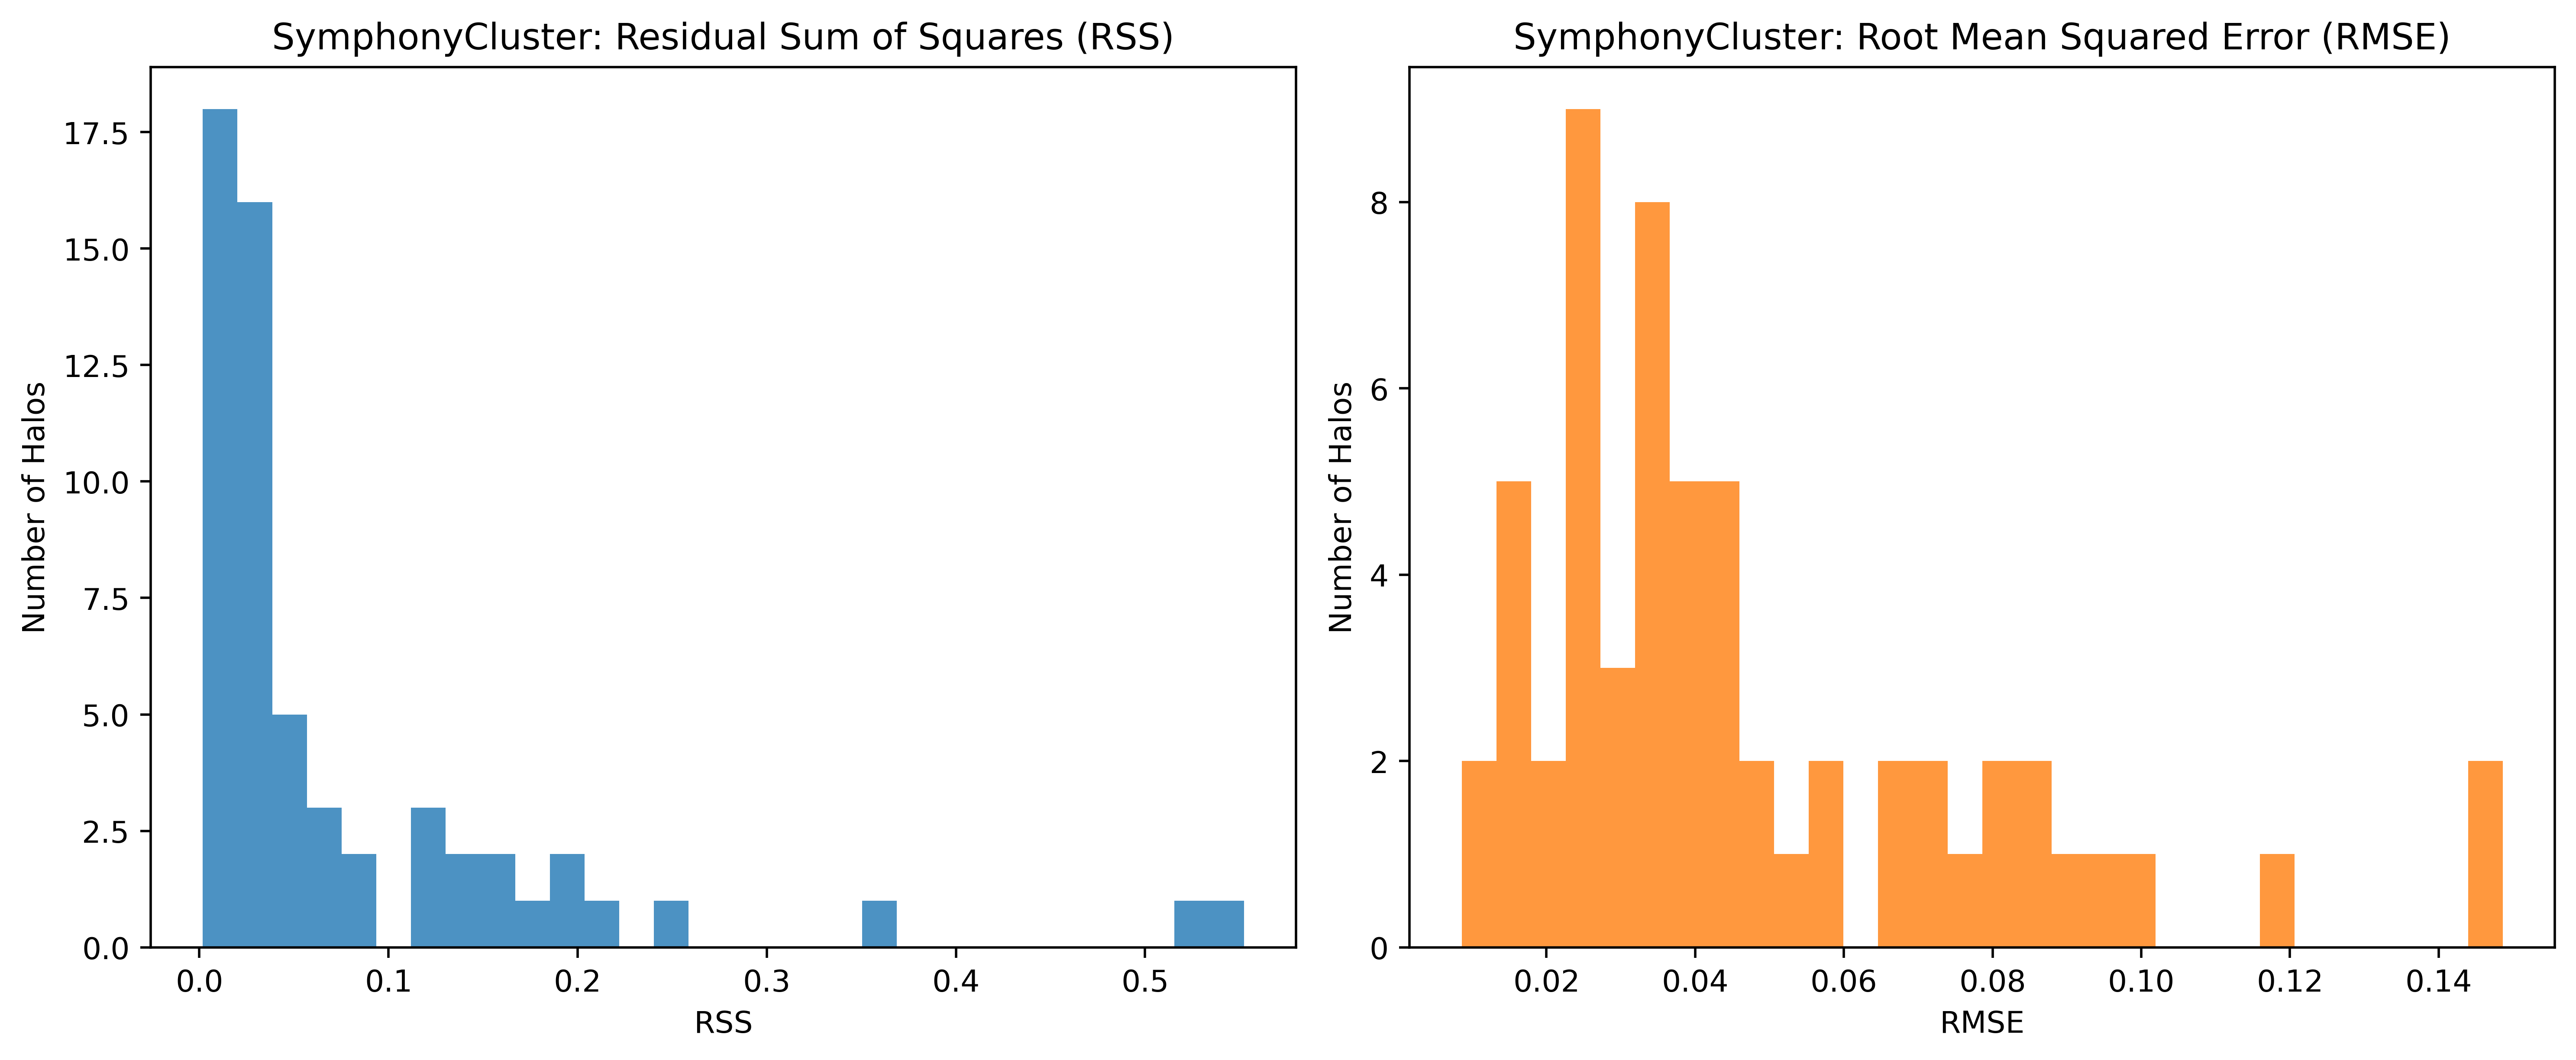

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gamma_model(r, a, b, c):
    return -(a + b / (1 + c * r))

def compute_and_plot_suite_fit_errors(base_dir, suite):
    slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
    files = sorted([f for f in os.listdir(slope_dir) if f.endswith(".csv")])

    results = []

    for f in files:
        halo_id = f.split(".csv")[0].replace("halo_", "")
        df = pd.read_csv(os.path.join(slope_dir, f))
        r = df["r_scaled"].values
        slope = df["slope_Q_r"].values

        # Valid mask
        mask = (r >= 0.01) & (r <= 1.0) & np.isfinite(slope)
        r_fit = r[mask]
        y_fit = slope[mask]
        if len(r_fit) == 0 or len(y_fit) == 0:
            continue  # skip halo with no usable data

        try:
            popt, _ = curve_fit(gamma_model, r_fit, y_fit, p0=[0, 0, 0])
            y_model = gamma_model(r_fit, *popt)
            residuals = y_fit - y_model
            rss = np.sum(residuals**2)
            rmse = np.sqrt(rss / len(r_fit))
            results.append({
                "halo_id": halo_id,
                "a": popt[0],
                "b": popt[1],
                "c": popt[2],
                "RSS": rss,
                "RMSE": rmse
            })
        except RuntimeError:
            continue  # fit failed

    df_results = pd.DataFrame(results)

    # Plot RSS and RMSE histograms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=500)
    
    ax1.hist(df_results["RSS"], bins=30, color="tab:blue", alpha=0.8)
    ax1.set_xlabel("RSS")
    ax1.set_ylabel("Number of Halos")
    ax1.set_title(f"{suite}: Residual Sum of Squares (RSS)")

    ax2.hist(df_results["RMSE"], bins=30, color="tab:orange", alpha=0.8)
    ax2.set_xlabel("RMSE")
    ax2.set_ylabel("Number of Halos")
    ax2.set_title(f"{suite}: Root Mean Squared Error (RMSE)")

    plt.tight_layout()
    plt.show()

    return df_results

def compute_and_plot_all_suites_fit_errors(base_dir, suite_names):
    all_results = []

    for suite in suite_names:
        print(f"\n▶ Processing suite: {suite}")
        df_suite = compute_and_plot_suite_fit_errors(base_dir, suite)
        df_suite["suite"] = suite
        all_results.append(df_suite)

    df_all = pd.concat(all_results, ignore_index=True)

    return df_all

suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]
df_all_errors = compute_and_plot_all_suites_fit_errors(base_dir, suite_names)

  Total halos      = 215
  Mean RMSE        = 0.0393
  Std. dev of RMSE = 0.0307
  RMSE < 0.05      = 168 halos (78.1%)
  RMSE > 0.10      = 12 halos (5.6%)


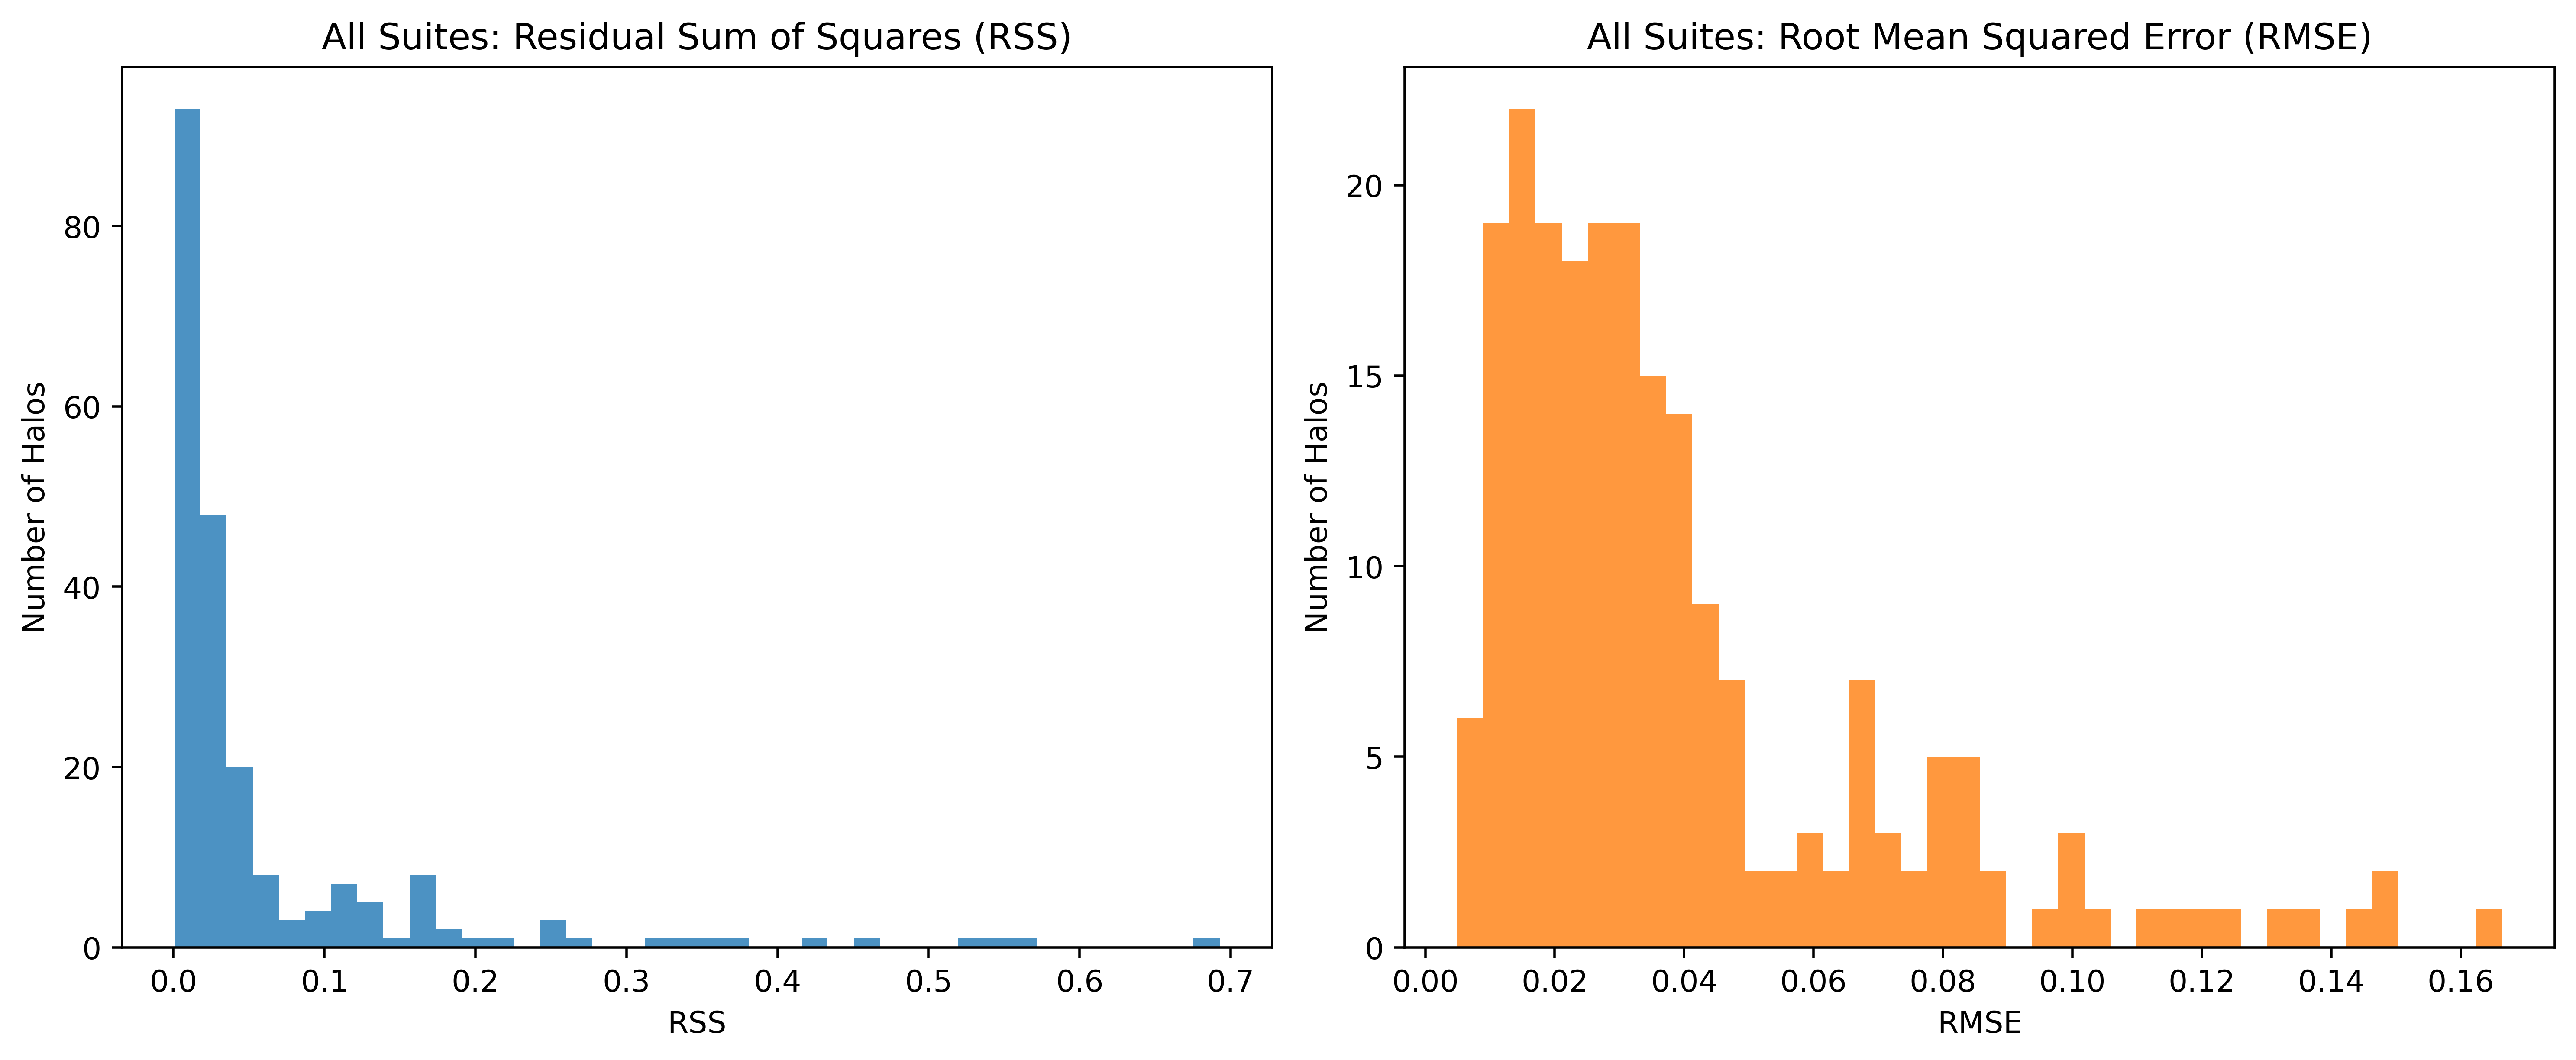

In [59]:
import matplotlib.pyplot as plt

def plot_global_fit_error_distribution(df_all_errors):
    rss_vals = df_all_errors["RSS"].values
    rmse_vals = df_all_errors["RMSE"].values

    # Statistics
    mean_rmse = np.mean(rmse_vals)
    std_rmse = np.std(rmse_vals)
    n_total = len(rmse_vals)
    n_good = np.sum(rmse_vals < 0.05)
    n_bad = np.sum(rmse_vals > 0.1)

    print(f"  Total halos      = {n_total}")
    print(f"  Mean RMSE        = {mean_rmse:.4f}")
    print(f"  Std. dev of RMSE = {std_rmse:.4f}")
    print(f"  RMSE < 0.05      = {n_good} halos ({n_good/n_total:.1%})")
    print(f"  RMSE > 0.10      = {n_bad} halos ({n_bad/n_total:.1%})")

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=500)

    ax1.hist(rss_vals, bins=40, color="tab:blue", alpha=0.8)
    ax1.set_xlabel("RSS")
    ax1.set_ylabel("Number of Halos")
    ax1.set_title("All Suites: Residual Sum of Squares (RSS)")

    ax2.hist(rmse_vals, bins=40, color="tab:orange", alpha=0.8)
    ax2.set_xlabel("RMSE")
    ax2.set_ylabel("Number of Halos")
    ax2.set_title("All Suites: Root Mean Squared Error (RMSE)")

    plt.tight_layout()
    plt.show()

plot_global_fit_error_distribution(df_all_errors)

📈 Refined linear regression after outlier rejection:
  a ∈ [-5, 5], b ∈ [-5, 5]
  Residual σ clipping = ±1.5σ
  Remaining points     = 143
  Slope (m)            = -0.9796
  Intercept (q)        = 2.0425
  R² (fit quality)     = 0.9757


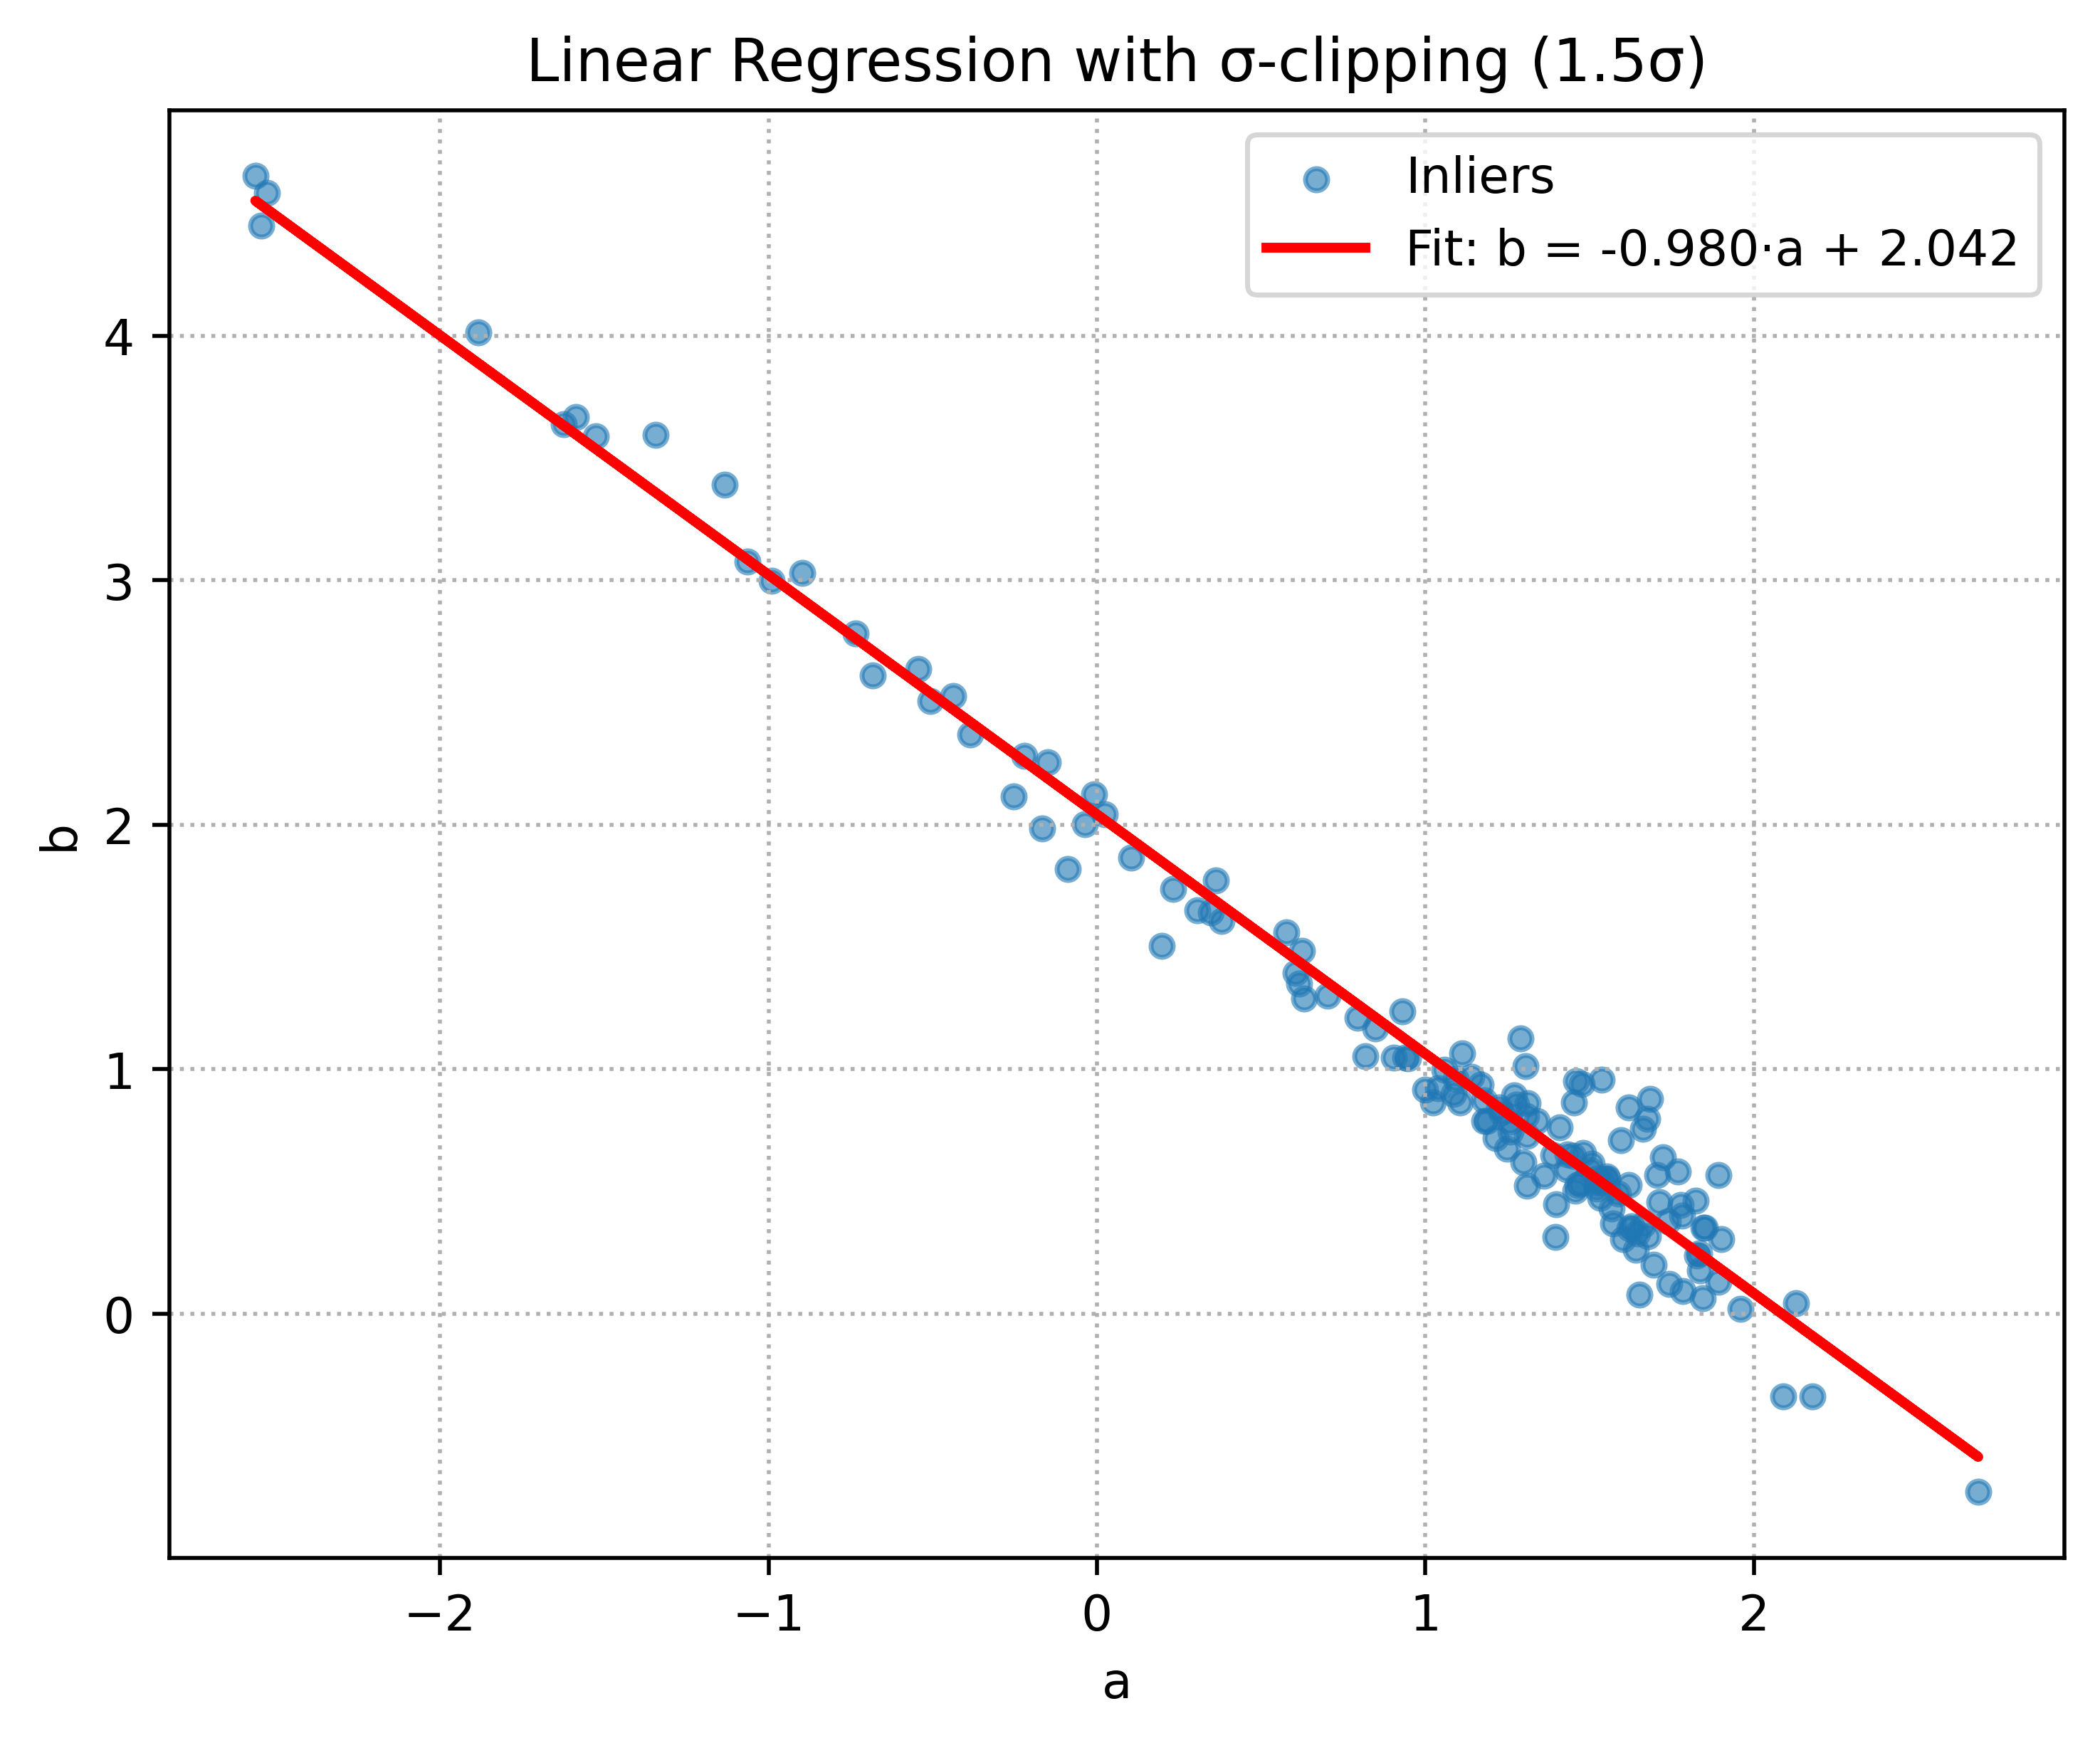

In [51]:
def regress_b_vs_a_masked_and_trim_outliers(df, a_range=(-5, 5), b_range=(-5, 5), sigma_clip=2.0):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression

    a_raw = df["a"].values
    b_raw = df["b"].values

    # 初步裁剪
    mask = (a_raw >= a_range[0]) & (a_raw <= a_range[1]) & \
           (b_raw >= b_range[0]) & (b_raw <= b_range[1])

    a_vals = a_raw[mask].reshape(-1, 1)
    b_vals = b_raw[mask]

    # 初次拟合
    model = LinearRegression()
    model.fit(a_vals, b_vals)
    b_pred = model.predict(a_vals)
    residuals = b_vals - b_pred

    # 残差裁剪
    std_resid = np.std(residuals)
    resid_mask = np.abs(residuals) < sigma_clip * std_resid
    a_final = a_vals[resid_mask]
    b_final = b_vals[resid_mask]

    # 最终拟合
    model.fit(a_final, b_final)
    b_fit = model.predict(a_final)

    coef = model.coef_[0]
    intercept = model.intercept_
    r2 = model.score(a_final, b_final)

    print("📈 Refined linear regression after outlier rejection:")
    print(f"  a ∈ [{a_range[0]}, {a_range[1]}], b ∈ [{b_range[0]}, {b_range[1]}]")
    print(f"  Residual σ clipping = ±{sigma_clip:.1f}σ")
    print(f"  Remaining points     = {len(a_final)}")
    print(f"  Slope (m)            = {coef:.4f}")
    print(f"  Intercept (q)        = {intercept:.4f}")
    print(f"  R² (fit quality)     = {r2:.4f}")

    # Plot
    plt.figure(figsize=(6, 5), dpi=500)
    plt.scatter(a_final, b_final, s=20, alpha=0.6, label="Inliers")
    plt.plot(a_final, b_fit, color="red", lw=2, label=f"Fit: b = {coef:.3f}·a + {intercept:.3f}")
    plt.xlabel("a")
    plt.ylabel("b")
    plt.title(f"Linear Regression with σ-clipping ({sigma_clip}σ)")
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

regress_b_vs_a_masked_and_trim_outliers(df_all_errors, a_range=(-5, 5), b_range=(-5, 5), sigma_clip=1.5)

  a = 1.3404, b = 0.6454, c = 1.4380
  Fitted Q₀ = 2.3618e+02


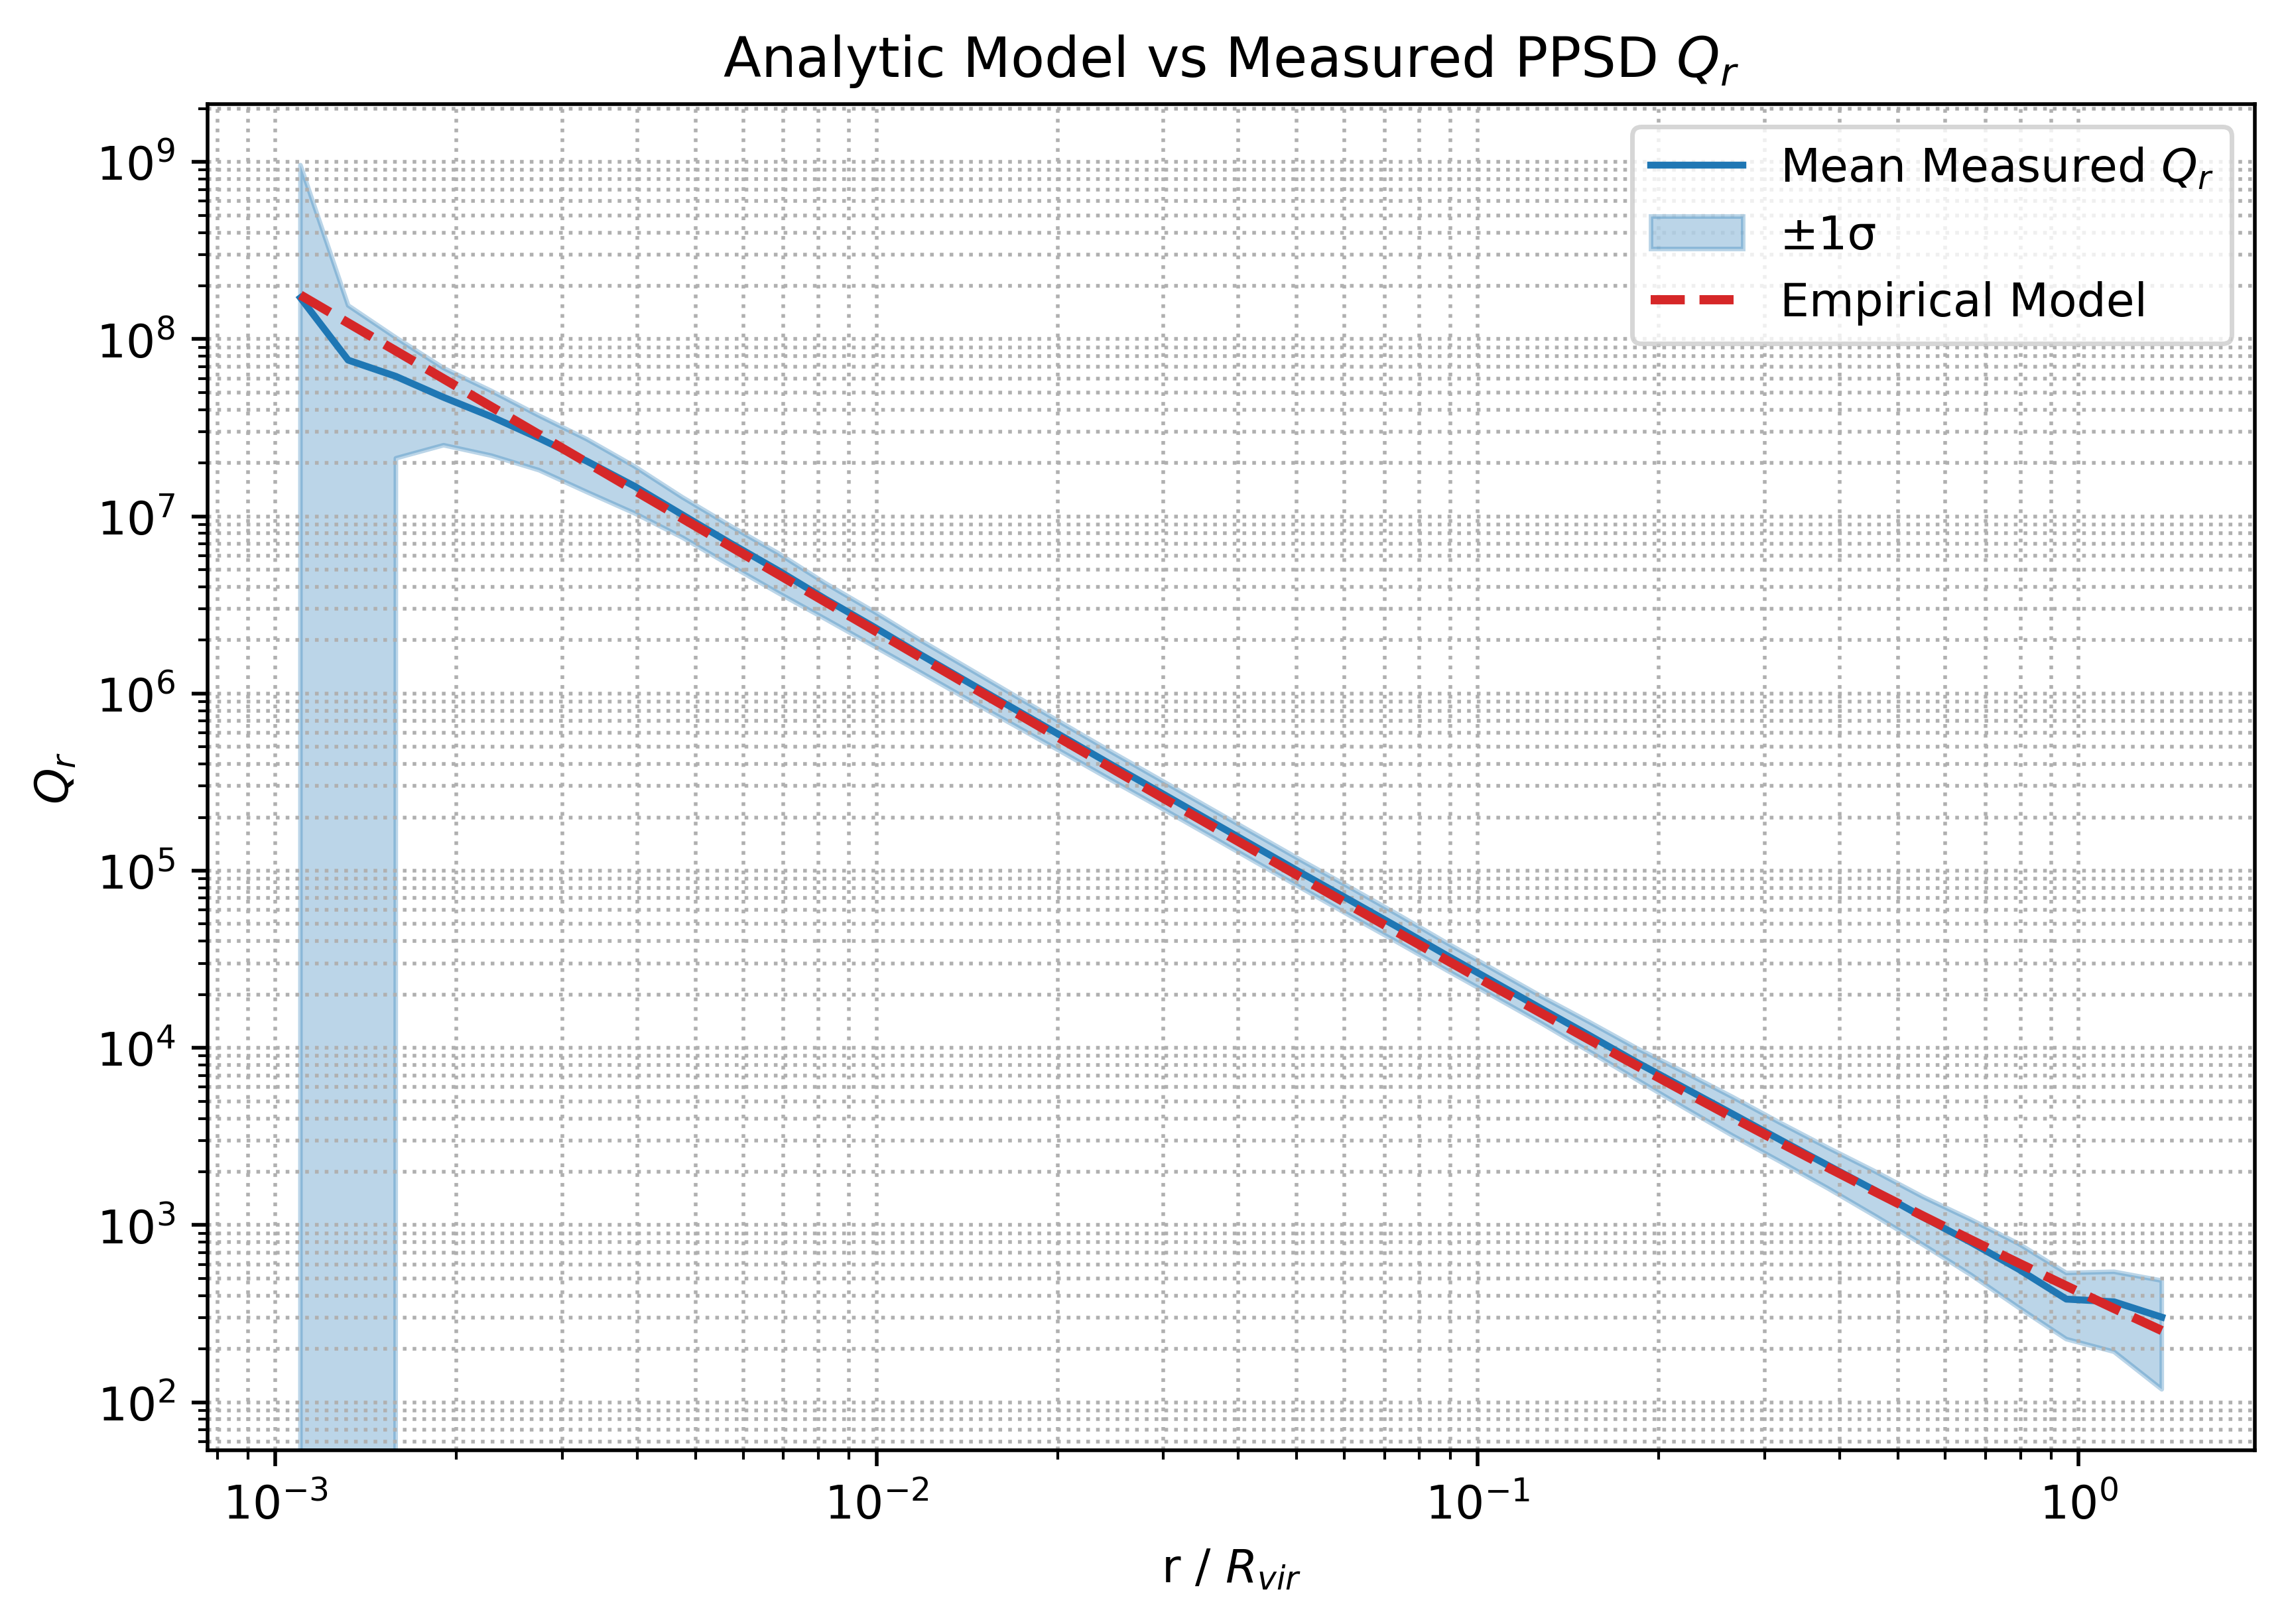

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Q_model_analytic(r, a, b, c, Q0=1.0):
    return Q0 * r**(-(a + b)) * (1 + c * r)**b

def plot_analytic_vs_measured_ppsd(base_dir, suite_names, a=1.34, b=0.645, c=1.438):
    ppsd_all, r_grid_ref = [], None

    for suite in suite_names:
        profile_dir = os.path.join(base_dir, "output", suite, "ppsd_profiles")
        files = sorted([f for f in os.listdir(profile_dir) if f.endswith(".csv")])

        for f in files:
            df = pd.read_csv(os.path.join(profile_dir, f))
            r = df["r_scaled"].values
            Qr = df["Q_r"].values

            if not np.all(np.isfinite(r)) or not np.all(np.isfinite(Qr)):
                continue

            if r_grid_ref is None:
                r_grid_ref = r
            if not np.allclose(r, r_grid_ref, rtol=1e-4, atol=1e-6):
                continue

            ppsd_all.append(Qr)

    Q_arr = np.array(ppsd_all)
    r = r_grid_ref
    mean_Q = np.nanmean(Q_arr, axis=0)
    std_Q = np.nanstd(Q_arr, axis=0)

    # Fit normalization Q0 using least squares on log scale
    Q_model = Q_model_analytic(r, a, b, c, Q0=1.0)
    log_Q_model = np.log(Q_model)
    log_mean_Q = np.log(mean_Q)
    offset = np.mean(log_mean_Q - log_Q_model)
    Q0_fit = np.exp(offset)
    Q_model_scaled = Q_model_analytic(r, a, b, c, Q0=Q0_fit)

    print(f"  a = {a:.4f}, b = {b:.4f}, c = {c:.4f}")
    print(f"  Fitted Q₀ = {Q0_fit:.4e}")

    # Plot
    plt.figure(figsize=(7, 5), dpi=500)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("r / $R_{vir}$")
    plt.ylabel("$Q_r$")
    plt.title("Analytic Model vs Measured PPSD $Q_r$")
    plt.plot(r, mean_Q, label="Mean Measured $Q_r$", color="tab:blue")
    plt.fill_between(r, mean_Q - std_Q, mean_Q + std_Q, color="tab:blue", alpha=0.3, label="±1σ")

    plt.plot(r, Q_model_scaled, label="Empirical Model", color="tab:red", lw=2, ls="--")
    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run
base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]

plot_analytic_vs_measured_ppsd(base_dir, suite_names, a=1.3404, b=0.6454, c=1.4380)

Code below is 2-paeameters version!!!

In [66]:
import os
import numpy as np
import pandas as pd
from glob import glob

def rho_nfw(c, r, Om0=0.286):
    f = np.log(1 + c) - c / (1 + c)
    x = r * c
    return 99 * c**3 / (3 * f) / (x * (1 + x) ** 2) / Om0

def compute_nfw_density_rmse(base_dir, suites, cvir_dict, r_min=0.01, r_max=1.0):
    results = []
    for suite in suites:
        prof_dir = os.path.join(base_dir, "output", suite, "density_profiles")
        files = sorted(glob(os.path.join(prof_dir, "halo_*_profile.csv")))
        if not files:
            continue
        for f in files:
            halo_id = os.path.basename(f).split("_")[1]
            df = pd.read_csv(f)
            if "r_scaled" not in df or "rho_scaled" not in df:
                continue

            r = df["r_scaled"].values
            rho = df["rho_scaled"].values

            mask = (r >= r_min) & (r <= r_max) & np.isfinite(rho)
            if np.sum(mask) < 5:
                continue
            r_masked = r[mask]
            rho_masked = rho[mask]

            try:
                rho_model = rho_nfw(cvir_dict[suite], r_masked)
                rmse = np.sqrt(np.mean((np.log10(rho_masked) - np.log10(rho_model))**2))
                results.append({
                    "suite": suite,
                    "halo_id": halo_id,
                    "RMSE_log10_rho": rmse
                })
            except:
                continue
    return pd.DataFrame(results)

base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suites = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]
cvir_dict = {
    "SymphonyLMC": 12.2,
    "SymphonyMilkyWay": 10.8,
    "SymphonyGroup": 9.0,
    "SymphonyLCluster": 5.0,
    "SymphonyCluster": 5.3,
}

df_rmse = compute_nfw_density_rmse(base_dir, suites, cvir_dict)
print(df_rmse.describe())


       RMSE_log10_rho
count      245.000000
mean         0.084506
std          0.036170
min          0.023175
25%          0.056702
50%          0.075194
75%          0.106552
max          0.243106


Fit γ_Q(r) = -(2 + a·r)/(1 + b·r) (r ∈ [0.01, 1])
  a = 2.7519
  b = 1.9426
  Slope at r=0.01 ≈ -1.9889
  Slope at r=1.0  ≈ -1.6149
  Asymptotic slope = -a/b ≈ -1.4166


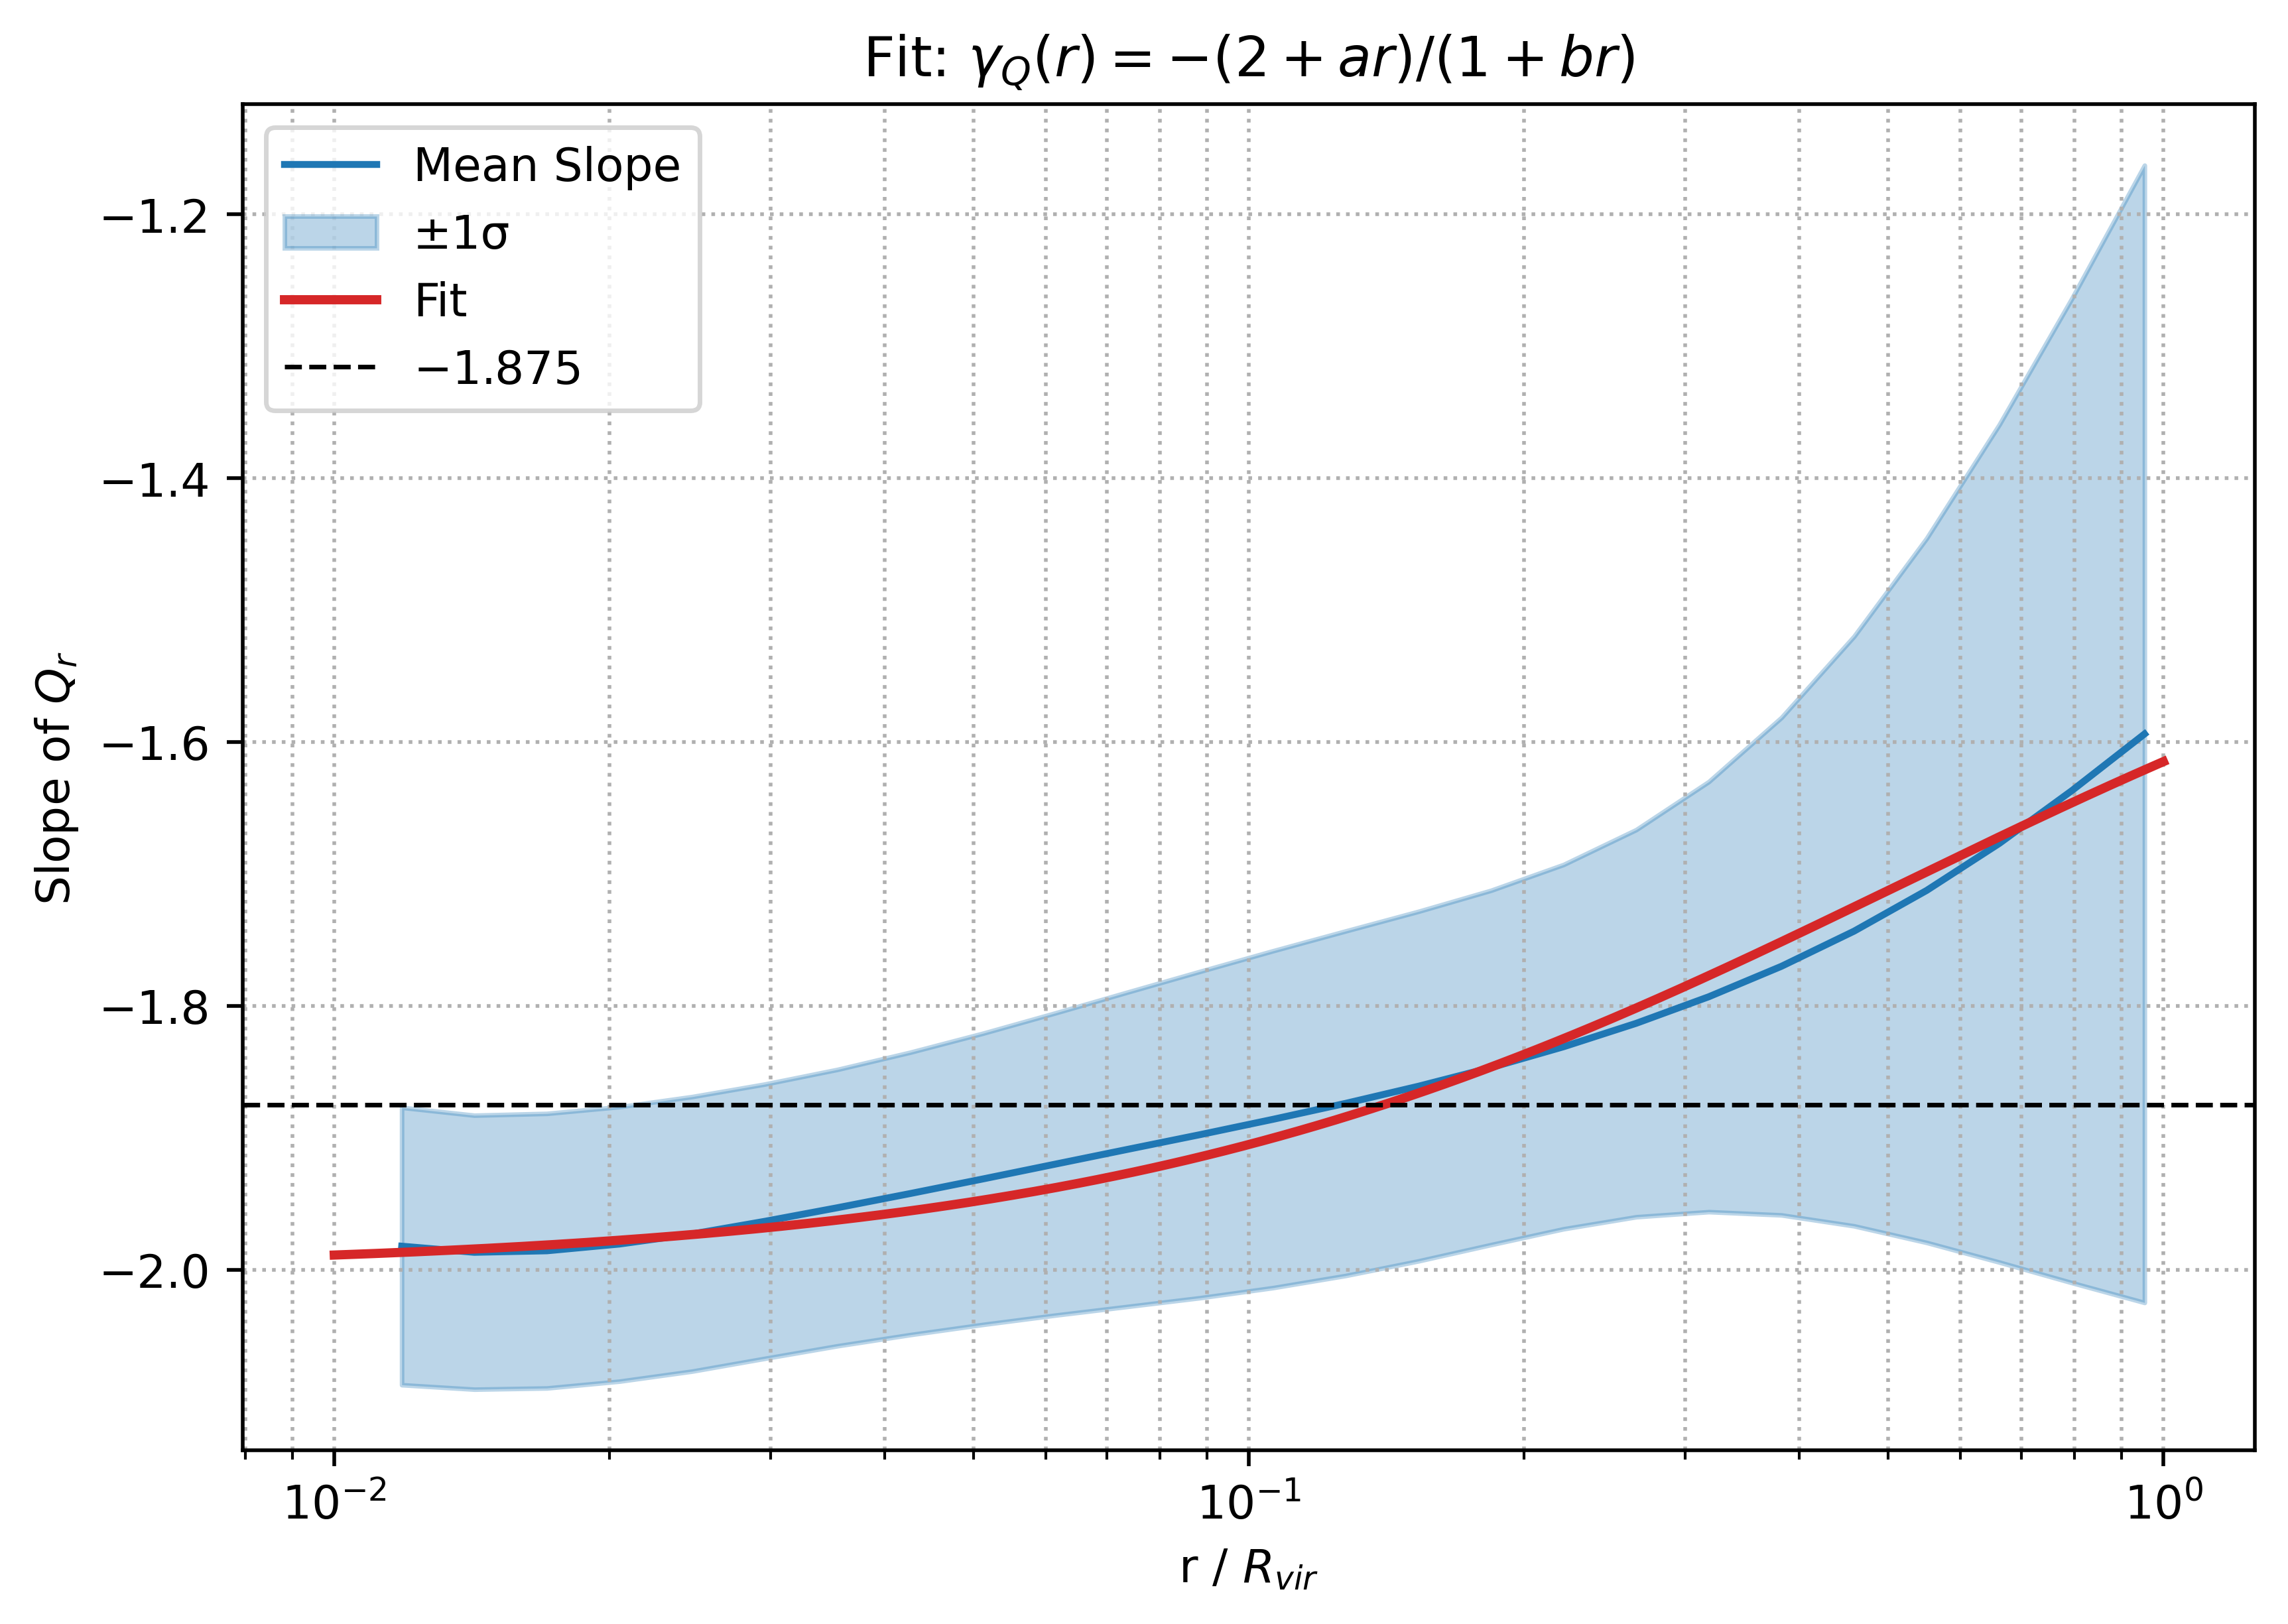

In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# New 2-parameter model
def gamma_Q_model(r, a, b):
    return -(2 + a * r) / (1 + b * r)

def fit_and_plot_custom_gamma_Q(base_dir, suite_names):
    slope_r_all, r_grid_ref = [], None

    for suite in suite_names:
        slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
        files = sorted([f for f in os.listdir(slope_dir) if f.endswith(".csv")])

        for f in files:
            df = pd.read_csv(os.path.join(slope_dir, f))
            r = df["r_scaled"].values
            s_Qr = df["slope_Q_r"].values

            if not np.all(np.isfinite(r)) or not np.all(np.isfinite(s_Qr)):
                continue

            if r_grid_ref is None:
                r_grid_ref = r
            if not np.allclose(r, r_grid_ref, rtol=1e-4, atol=1e-6):
                continue

            slope_r_all.append(s_Qr)

    slope_r_all = np.array(slope_r_all)
    r = r_grid_ref
    mean_slope = np.nanmean(slope_r_all, axis=0)
    std_slope = np.nanstd(slope_r_all, axis=0)

    # Restrict to r ∈ [0.01, 1]
    mask = (r >= 0.01) & (r <= 1.0) & np.isfinite(mean_slope)
    r_fit = r[mask]
    y_fit = mean_slope[mask]
    std_fit = std_slope[mask]

    # Fit the new model
    popt, pcov = curve_fit(gamma_Q_model, r_fit, y_fit, p0=[1.0, 1.0])
    a_fit, b_fit = popt

    print("Fit γ_Q(r) = -(2 + a·r)/(1 + b·r) (r ∈ [0.01, 1])")
    print(f"  a = {a_fit:.4f}")
    print(f"  b = {b_fit:.4f}")
    print(f"  Slope at r=0.01 ≈ {gamma_Q_model(0.01, *popt):.4f}")
    print(f"  Slope at r=1.0  ≈ {gamma_Q_model(1.0, *popt):.4f}")
    print(f"  Asymptotic slope = -a/b ≈ {-a_fit/b_fit:.4f}")

    # Plotting
    plt.figure(figsize=(7, 5), dpi=500)
    plt.xscale("log")
    plt.xlabel("r / $R_{{vir}}$")
    plt.ylabel("Slope of $Q_r$")
    plt.title("Fit: $\\gamma_Q(r) = -(2 + a r)/(1 + b r)$")
    plt.plot(r_fit, y_fit, color="tab:blue", label="Mean Slope")
    plt.fill_between(r_fit, y_fit - std_fit, y_fit + std_fit, color="tab:blue", alpha=0.3, label="±1σ")

    r_dense = np.logspace(np.log10(0.01), np.log10(1.0), 500)
    fitted_curve = gamma_Q_model(r_dense, *popt)
    plt.plot(r_dense, fitted_curve, color="tab:red", lw=2, ls="-", label="Fit")

    plt.axhline(-1.875, color="black", ls="--", lw=1, label="$-1.875$")
    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run
base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]
fit_and_plot_custom_gamma_Q(base_dir, suite_names)

📊 Global RMSE Statistics:
  Total halos      = 236
  Mean RMSE        = 0.0629
  Std. dev of RMSE = 0.0439
  RMSE < 0.05      = 111 halos (47.0%)
  RMSE > 0.10      = 32 halos (13.6%)


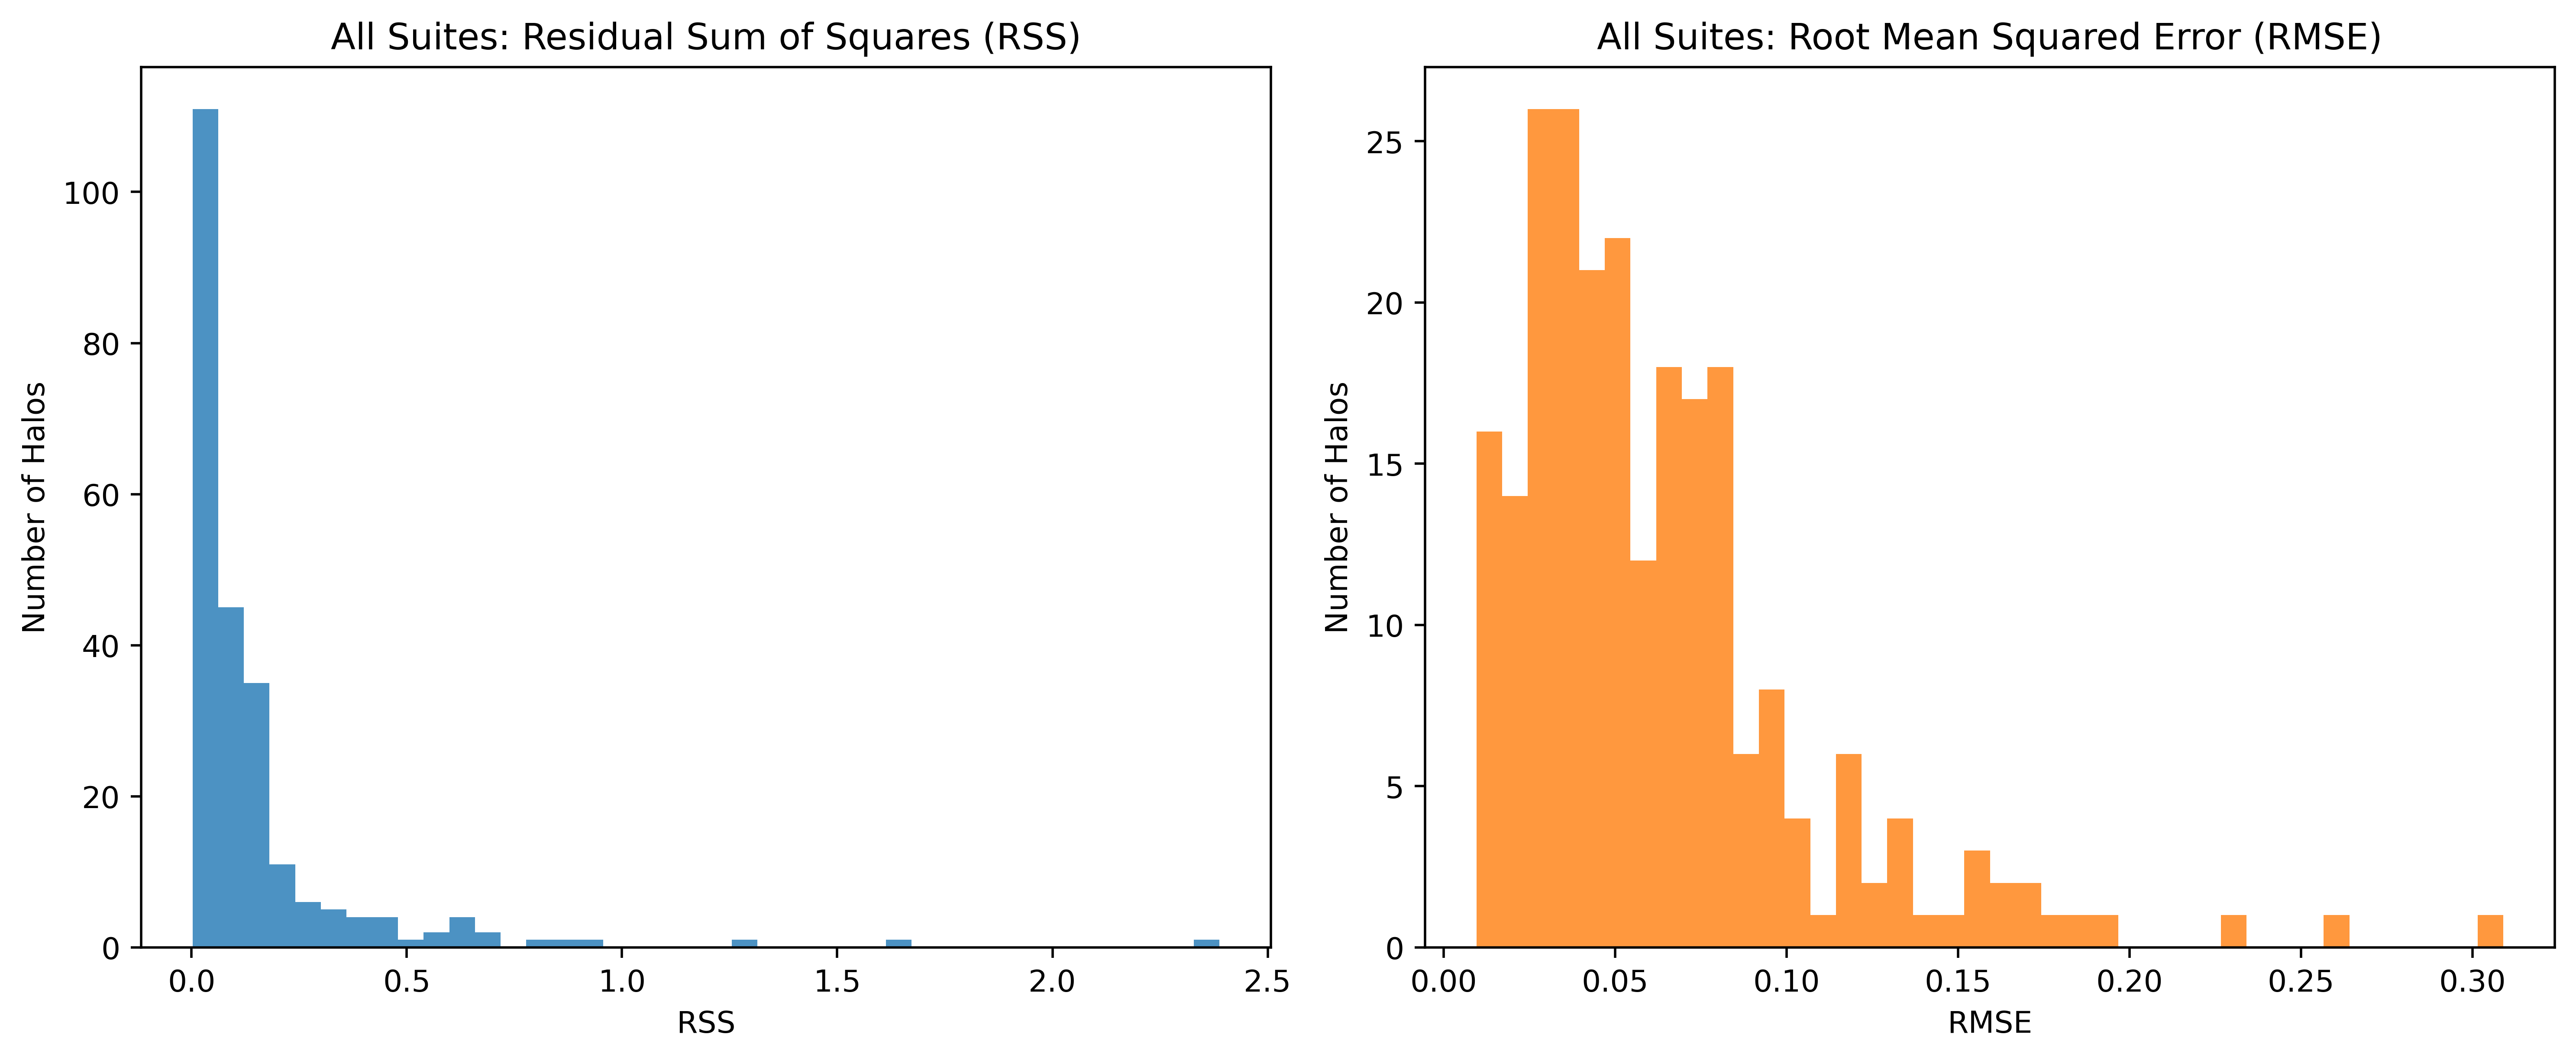

In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Correct 2-parameter model
def gamma_model(r, a, b):
    return -(2 + a * r) / (1 + b * r)

def compute_and_plot_suite_fit_errors(base_dir, suite):
    slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
    files = sorted([f for f in os.listdir(slope_dir) if f.endswith(".csv")])

    results = []

    for f in files:
        halo_id = f.split(".csv")[0].replace("halo_", "")
        df = pd.read_csv(os.path.join(slope_dir, f))
        r = df["r_scaled"].values
        slope = df["slope_Q_r"].values

        # Valid mask
        mask = (r >= 0.01) & (r <= 1.0) & np.isfinite(slope)
        r_fit = r[mask]
        y_fit = slope[mask]
        if len(r_fit) == 0 or len(y_fit) == 0:
            continue

        try:
            popt, _ = curve_fit(gamma_model, r_fit, y_fit, p0=[1.0, 1.0])
            y_model = gamma_model(r_fit, *popt)
            residuals = y_fit - y_model
            rss = np.sum(residuals**2)
            rmse = np.sqrt(rss / len(r_fit))
            results.append({
                "halo_id": halo_id,
                "a": popt[0],
                "b": popt[1],
                "RSS": rss,
                "RMSE": rmse
            })
        except RuntimeError:
            continue  # fit failed

    df_results = pd.DataFrame(results)

    # Plot RSS and RMSE histograms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=500)

    ax1.hist(df_results["RSS"], bins=30, color="tab:blue", alpha=0.8)
    ax1.set_xlabel("RSS")
    ax1.set_ylabel("Number of Halos")
    ax1.set_title(f"{suite}: Residual Sum of Squares (RSS)")

    ax2.hist(df_results["RMSE"], bins=30, color="tab:orange", alpha=0.8)
    ax2.set_xlabel("RMSE")
    ax2.set_ylabel("Number of Halos")
    ax2.set_title(f"{suite}: Root Mean Squared Error (RMSE)")

    plt.tight_layout()
    plt.show()

    return df_results

import matplotlib.pyplot as plt

def plot_global_fit_error_distribution(df_all_errors):
    rss_vals = df_all_errors["RSS"].values
    rmse_vals = df_all_errors["RMSE"].values

    # Statistics
    mean_rmse = np.mean(rmse_vals)
    std_rmse = np.std(rmse_vals)
    n_total = len(rmse_vals)
    n_good = np.sum(rmse_vals < 0.05)
    n_bad = np.sum(rmse_vals > 0.1)

    print("📊 Global RMSE Statistics:")
    print(f"  Total halos      = {n_total}")
    print(f"  Mean RMSE        = {mean_rmse:.4f}")
    print(f"  Std. dev of RMSE = {std_rmse:.4f}")
    print(f"  RMSE < 0.05      = {n_good} halos ({n_good/n_total:.1%})")
    print(f"  RMSE > 0.10      = {n_bad} halos ({n_bad/n_total:.1%})")

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=500)

    ax1.hist(rss_vals, bins=40, color="tab:blue", alpha=0.8)
    ax1.set_xlabel("RSS")
    ax1.set_ylabel("Number of Halos")
    ax1.set_title("All Suites: Residual Sum of Squares (RSS)")

    ax2.hist(rmse_vals, bins=40, color="tab:orange", alpha=0.8)
    ax2.set_xlabel("RMSE")
    ax2.set_ylabel("Number of Halos")
    ax2.set_title("All Suites: Root Mean Squared Error (RMSE)")

    plt.tight_layout()
    plt.show()

def compute_and_plot_all_suites_fit_errors(base_dir, suite_names):
    all_results = []

    for suite in suite_names:
        print(f"\n▶ Processing suite: {suite}")
        df_suite = compute_and_plot_suite_fit_errors(base_dir, suite)
        df_suite["suite"] = suite
        all_results.append(df_suite)

    df_all = pd.concat(all_results, ignore_index=True)

    return df_all

plot_global_fit_error_distribution(df_all_errors)

 Fitted gamma_Q(r): a = 2.7292, b = 1.9288
 Fitted normalization: Q0 = 2.2888e+02


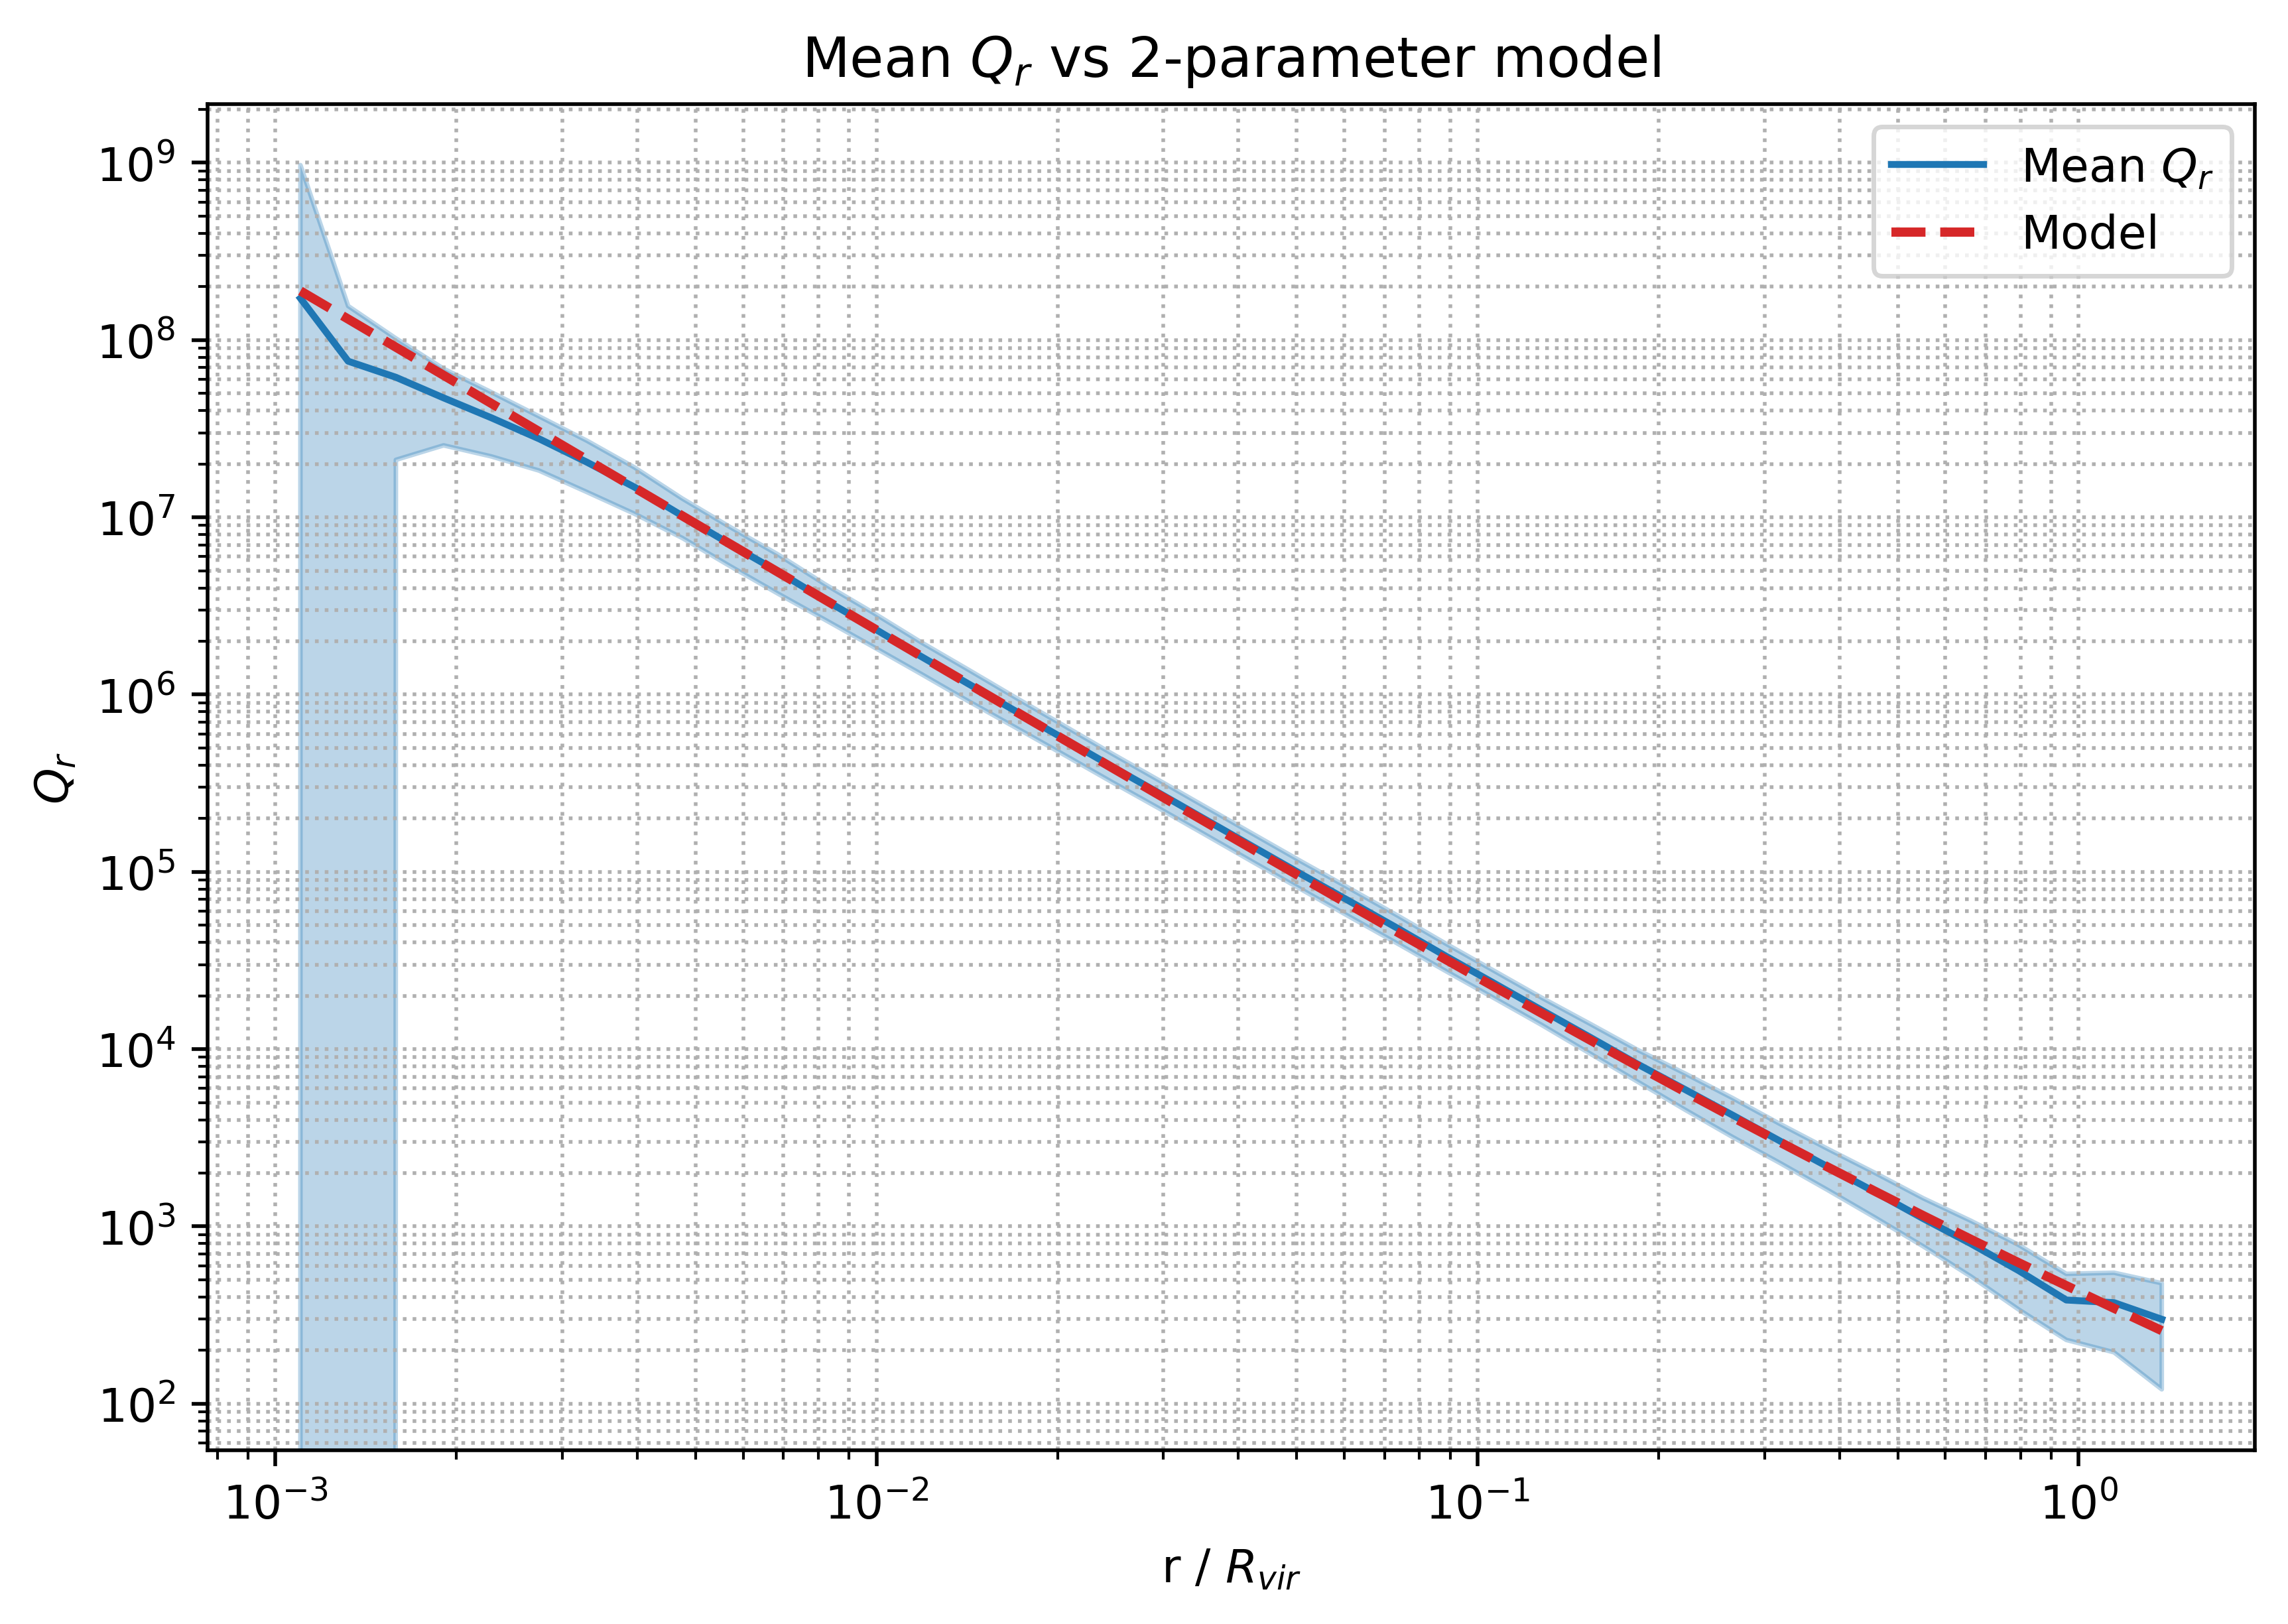

In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Two-parameter slope model
def gamma_Q_model(r, a, b):
    return -(2 + a * r) / (1 + b * r)

# Integrated Q(r) from gamma_Q
def Q_model(r, Q0, a, b):
    exponent = -(a - 2*b) / b
    return Q0 * r**(-2) * (1 + b * r)**exponent

def fit_and_compare_ppsd_vs_model(base_dir, suite_names):
    slope_r_all, Qr_all, r_grid_ref = [], [], None

    for suite in suite_names:
        slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
        Q_dir     = os.path.join(base_dir, "output", suite, "ppsd_profiles")
        slope_files = sorted([f for f in os.listdir(slope_dir) if f.endswith(".csv")])
        Q_files     = sorted([f for f in os.listdir(Q_dir) if f.endswith(".csv")])

        for fs, fq in zip(slope_files, Q_files):
            dfs = pd.read_csv(os.path.join(slope_dir, fs))
            dfq = pd.read_csv(os.path.join(Q_dir, fq))

            r = dfs["r_scaled"].values
            s_Qr = dfs["slope_Q_r"].values
            Qr = dfq["Q_r"].values

            if not (np.all(np.isfinite(r)) and np.all(np.isfinite(s_Qr)) and np.all(np.isfinite(Qr))):
                continue

            if r_grid_ref is None:
                r_grid_ref = r
            if not np.allclose(r, r_grid_ref, rtol=1e-4, atol=1e-6):
                continue

            slope_r_all.append(s_Qr)
            Qr_all.append(Qr)

    slope_r_all = np.array(slope_r_all)
    Qr_all = np.array(Qr_all)
    r = r_grid_ref

    # Mean slope and Q
    mean_slope = np.nanmean(slope_r_all, axis=0)
    std_slope  = np.nanstd(slope_r_all, axis=0)
    mean_Q     = np.nanmean(Qr_all, axis=0)
    std_Q      = np.nanstd(Qr_all, axis=0)

    # Fit gamma model to slope
    mask = (r >= 0.01) & (r <= 1.0) & np.isfinite(mean_slope)
    r_fit = r[mask]
    y_fit = mean_slope[mask]

    popt, _ = curve_fit(gamma_Q_model, r_fit, y_fit, p0=[1.0, 1.0])
    a_fit, b_fit = popt

    print(f" Fitted gamma_Q(r): a = {a_fit:.4f}, b = {b_fit:.4f}")

    # Now fit Q0 using model Q vs mean_Q
    Q_model_vals = lambda r, Q0: Q_model(r, Q0, a_fit, b_fit)
    popt_Q, _ = curve_fit(Q_model_vals, r[mask], mean_Q[mask], p0=[1.0])
    Q0_fit = popt_Q[0]
    print(f" Fitted normalization: Q0 = {Q0_fit:.4e}")

    # Plot comparison
    plt.figure(figsize=(7, 5), dpi=500)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("r / $R_{vir}$")
    plt.ylabel("$Q_r$")
    plt.title("Mean $Q_r$ vs 2-parameter model")

    plt.plot(r, mean_Q, color="tab:blue", label="Mean $Q_r$")
    plt.fill_between(r, mean_Q - std_Q, mean_Q + std_Q, color="tab:blue", alpha=0.3)

    Q_model_fit = Q_model(r, Q0_fit, a_fit, b_fit)
    plt.plot(r, Q_model_fit, color="tab:red", ls="--", lw=2, label="Model")

    plt.grid(True, which="both", linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return a_fit, b_fit, Q0_fit

base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]

a_fit, b_fit, Q0_fit = fit_and_compare_ppsd_vs_model(base_dir, suite_names)

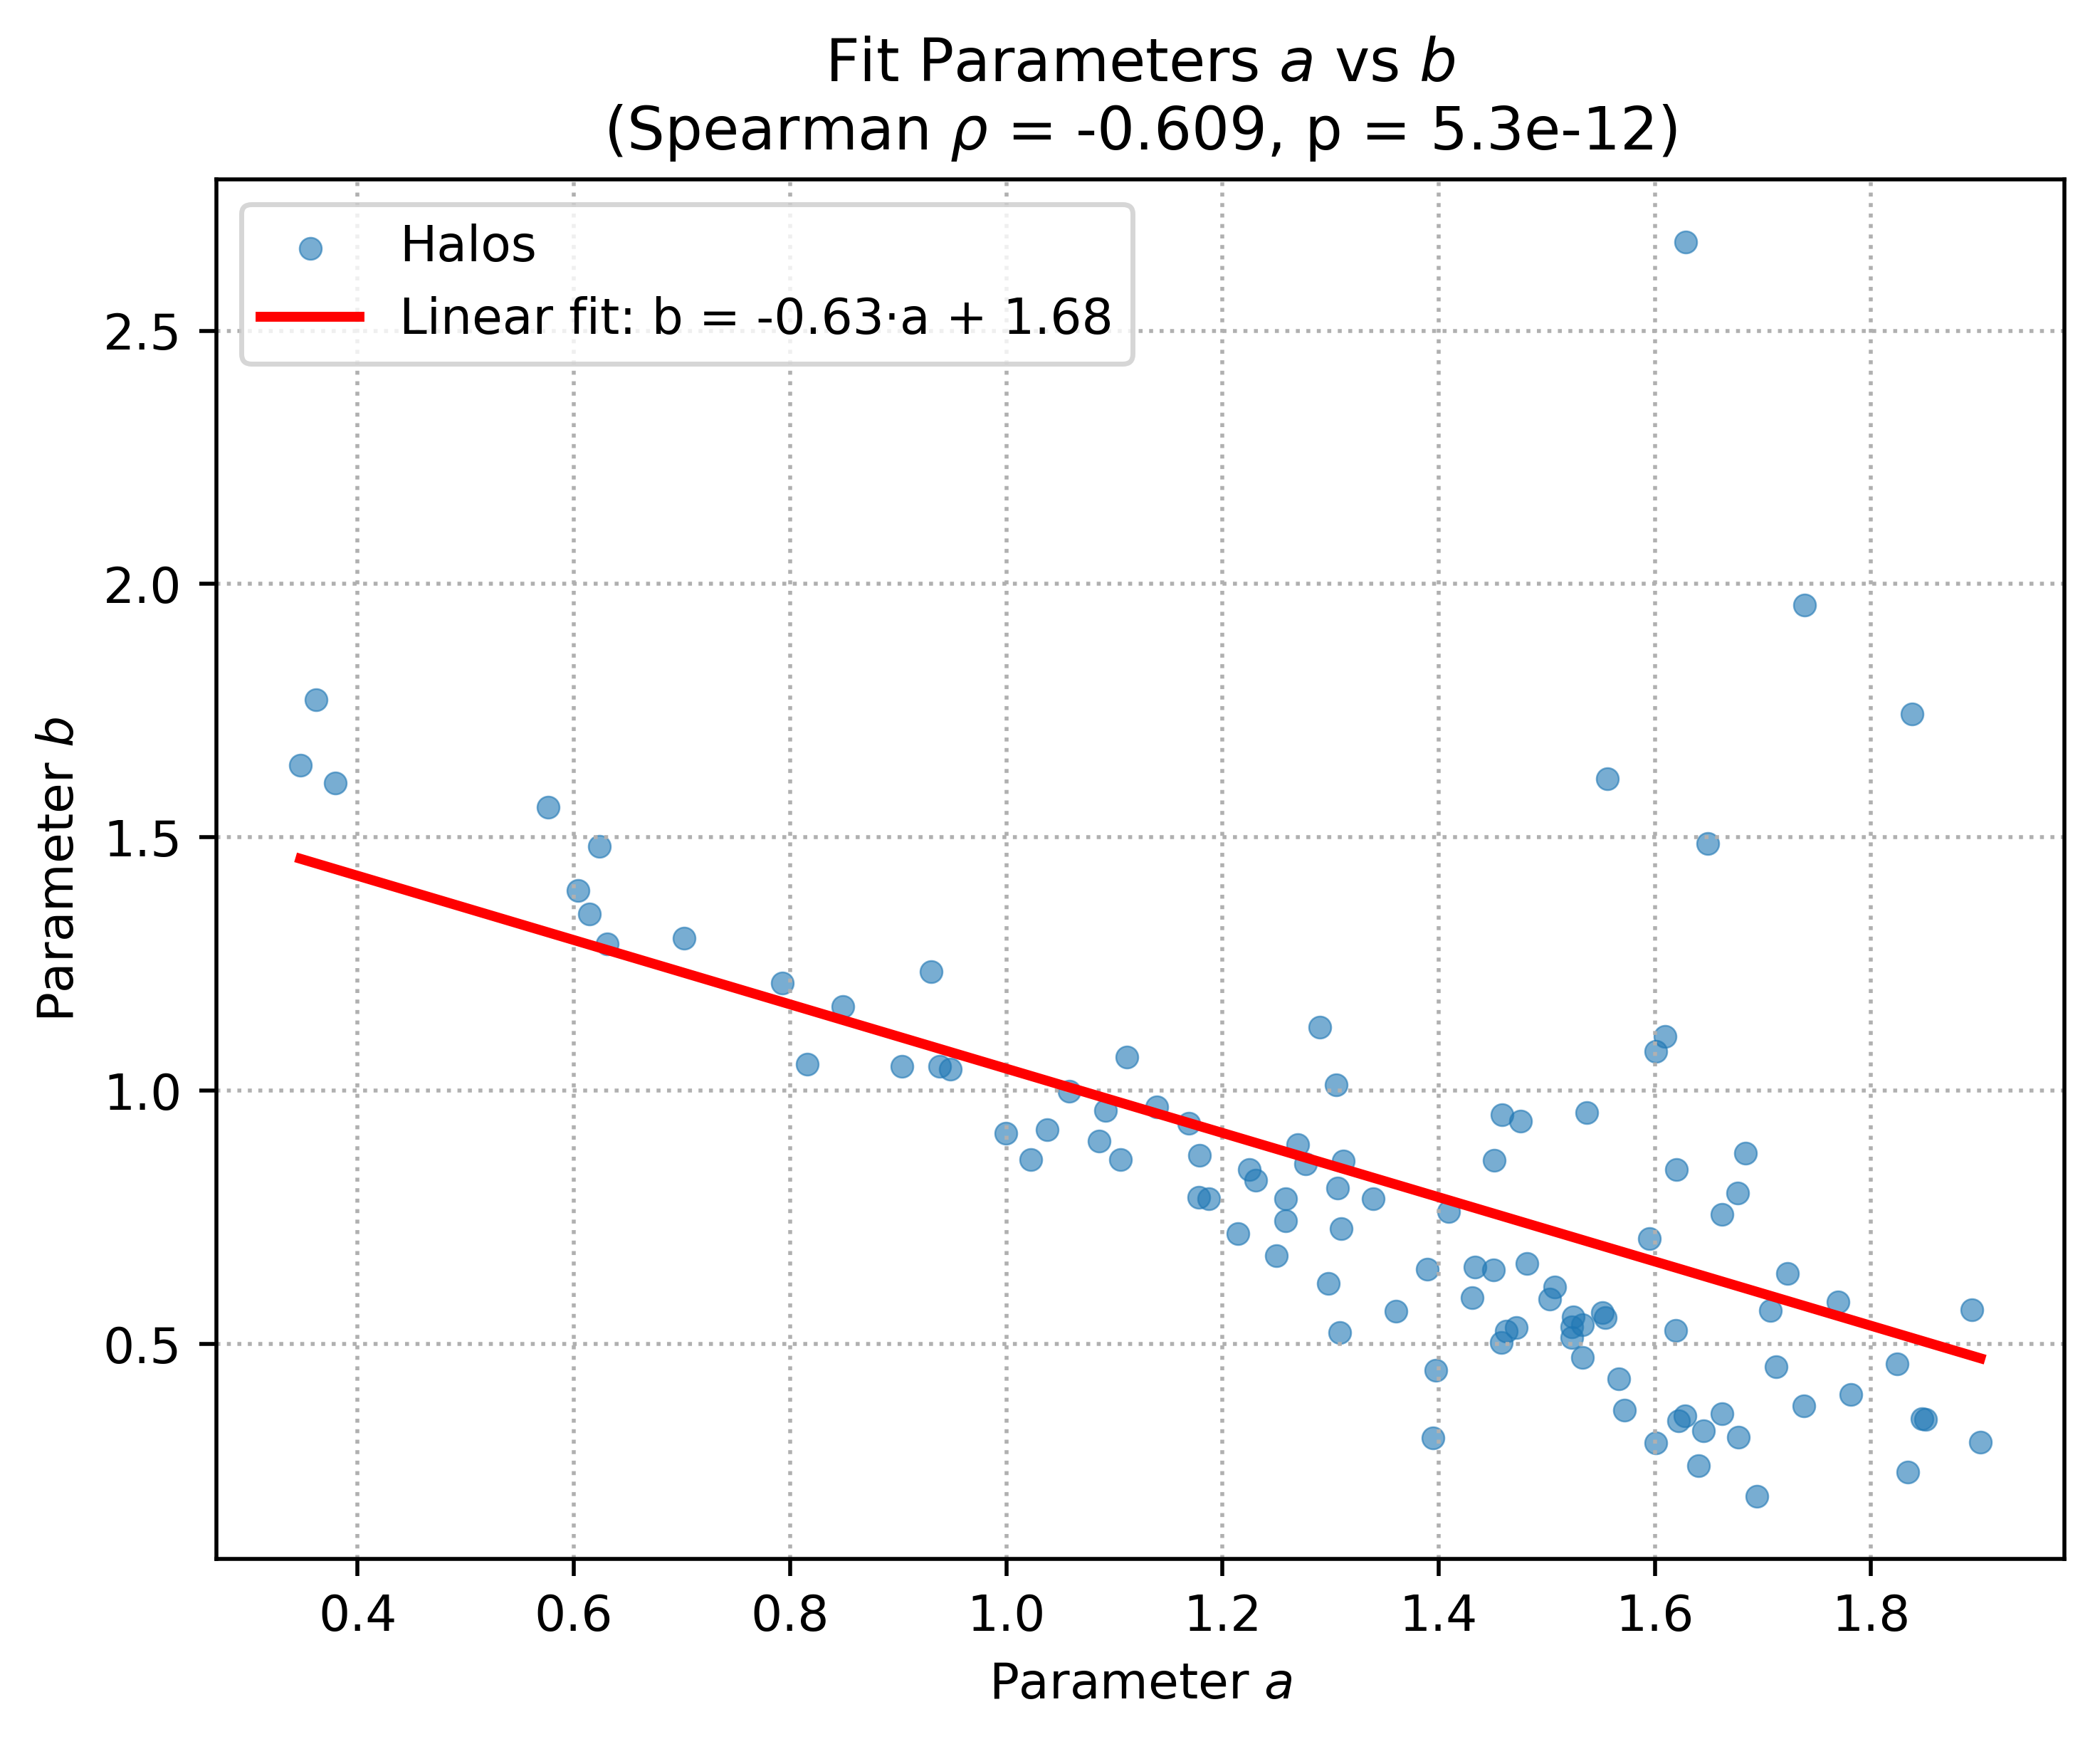

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, linregress
import numpy as np

def plot_ab_distribution_with_fit(df_all_errors, trim_quantiles=(0.01, 0.99)):
    a_raw = df_all_errors["a"].values
    b_raw = df_all_errors["b"].values

    a_min, a_max = np.nanquantile(a_raw, trim_quantiles)
    b_min, b_max = np.nanquantile(b_raw, trim_quantiles)
    mask = (a_raw >= a_min) & (a_raw <= a_max) & (b_raw >= b_min) & (b_raw <= b_max)

    a = a_raw[mask]
    b = b_raw[mask]

    # Spearman
    rho, pval = spearmanr(a, b)

    # Linear regression
    slope, intercept, r_value, _, _ = linregress(a, b)
    line_x = np.linspace(a.min(), a.max(), 100)
    line_y = slope * line_x + intercept

    # Plot
    plt.figure(figsize=(6, 5), dpi=500)
    sns.scatterplot(x=a, y=b, s=20, alpha=0.6, edgecolor=None, label="Halos")
    plt.plot(line_x, line_y, color="red", lw=2, label=f"Linear fit: b = {slope:.2f}·a + {intercept:.2f}")
    plt.xlabel("Parameter $a$")
    plt.ylabel("Parameter $b$")
    plt.title("Fit Parameters $a$ vs $b$\n(Spearman $\\rho$ = {:.3f}, p = {:.1e})".format(rho, pval))
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_ab_distribution_with_fit(df_all_errors, trim_quantiles=(0.25, 0.85))

  Sample size  = 224
  ρ = 0.4098, p = 1.75e-10


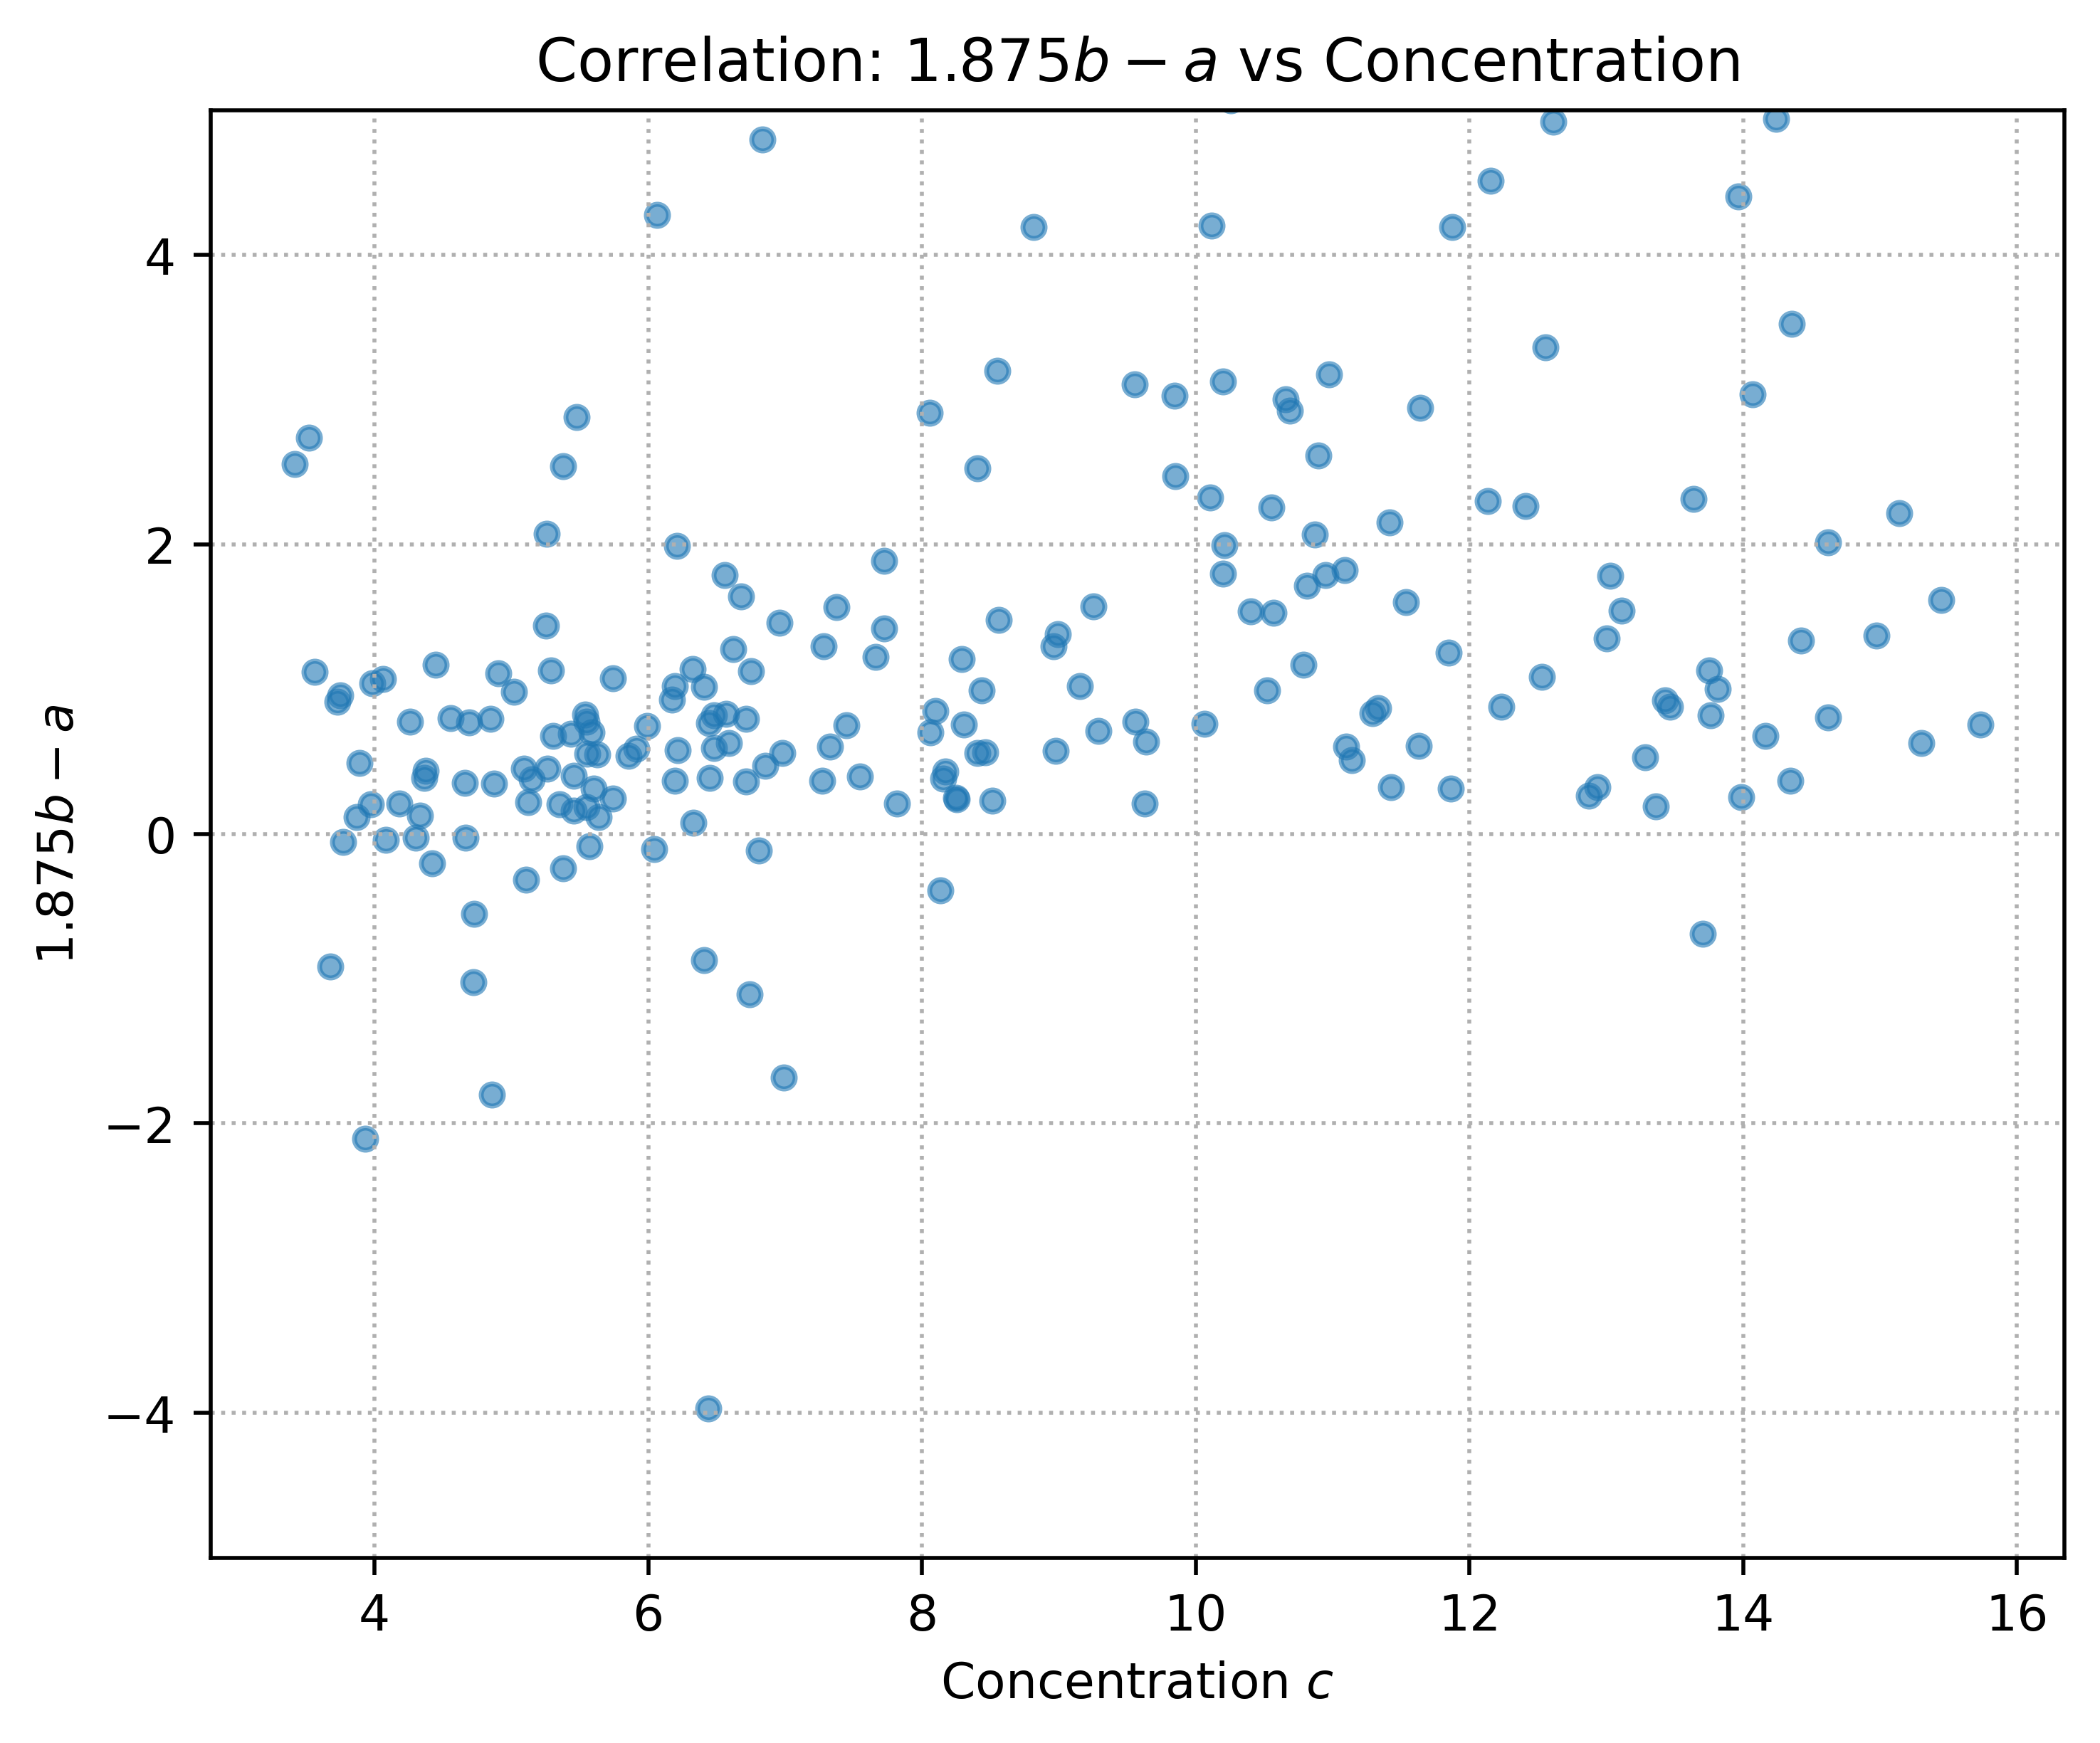

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import spearmanr
from glob import glob

def gamma_model(r, a, b):
    return -(2 + a * r) / (1 + b * r)

def compute_params_and_concentration(base_dir, suite_names):
    all_data = []

    for suite in suite_names:
        slope_dir = os.path.join(base_dir, "output", suite, "ppsd_slope_profiles_r")
        conc_path = os.path.join(base_dir, "output", suite, "halo_concentrations.csv")
        df_conc = pd.read_csv(conc_path)
        df_conc["halo_id"] = df_conc["halo_id"].astype(str).str.zfill(3)

        for f in sorted(glob(os.path.join(slope_dir, "halo_*.csv"))):
            halo_id = os.path.basename(f).split("_")[1].split(".")[0]
            df = pd.read_csv(f)
            r = df["r_scaled"].values
            slope = df["slope_Q_r"].values
            mask = (r >= 0.01) & (r <= 1.0) & np.isfinite(slope)
            r_fit = r[mask]
            y_fit = slope[mask]
            if len(r_fit) < 5:
                continue
            try:
                popt, _ = curve_fit(gamma_model, r_fit, y_fit, p0=[1.0, 1.0])
                a, b = popt
                c_row = df_conc[df_conc["halo_id"] == halo_id]
                if not c_row.empty:
                    cvir = c_row["cvir"].values[0]
                    all_data.append({
                        "suite": suite,
                        "halo_id": halo_id,
                        "a": a,
                        "b": b,
                        "cvir": cvir,
                        "slope_bias": 1.875 * b - a
                    })
            except RuntimeError:
                continue

    return pd.DataFrame(all_data)

def analyze_slope_bias_vs_concentration(base_dir, suite_names, trim=(0.01, 0.99)):
    df = compute_params_and_concentration(base_dir, suite_names)
    if df.empty:
        print("❌ No valid halo fits found.")
        return

    # Trim
    bias = df["slope_bias"].values
    cvir = df["cvir"].values
    qmin_bias, qmax_bias = np.quantile(bias, trim)
    qmin_c, qmax_c = np.quantile(cvir, trim)
    mask = (bias >= qmin_bias) & (bias <= qmax_bias) & (cvir >= qmin_c) & (cvir <= qmax_c)

    x = df["cvir"].values[mask]
    y = df["slope_bias"].values[mask]

    # Spearman
    rho, pval = spearmanr(x, y)

    print(f"  Sample size  = {len(x)}")
    print(f"  ρ = {rho:.4f}, p = {pval:.2e}")

    # Plot
    plt.figure(figsize=(6, 5), dpi=500)
    plt.scatter(x, y, s=20, alpha=0.6)
    plt.ylim(-5, 5)
    plt.xlabel("Concentration $c$")
    plt.ylabel(r"$1.875 b - a$")
    plt.title("Correlation: $1.875 b - a$ vs Concentration")
    plt.grid(True, linestyle=":")
    plt.tight_layout()
    plt.show()

    return df

base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]
df_result = analyze_slope_bias_vs_concentration(base_dir, suite_names)

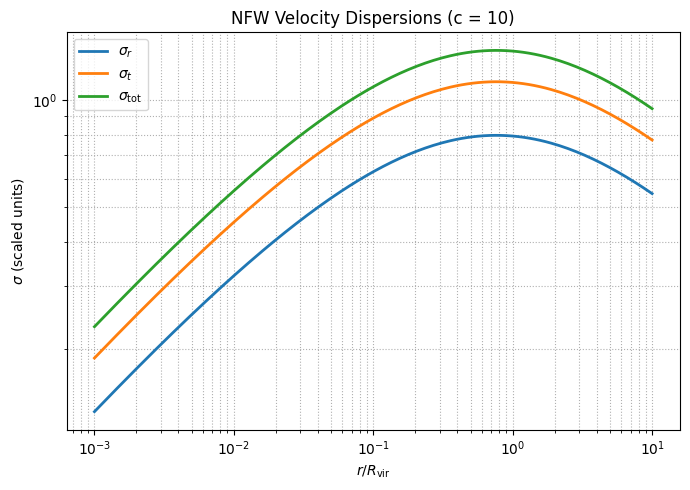

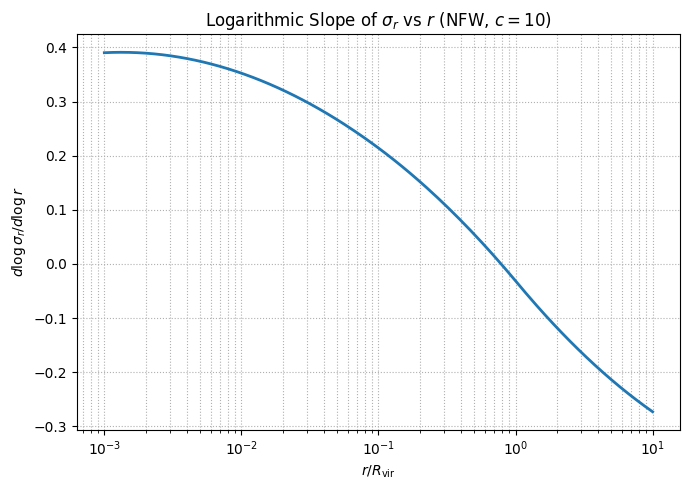

In [78]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt 
def nfw_velocity_profiles(c, x):
    g_c = 1 / (np.log(1 + c) - c / (1 + c))

    def integrand(t):
        g_t = np.log(1 + t) - t / (1 + t)
        return g_t / (t**3 * (1 + t)**2)

    integral, _ = quad(integrand, x, np.inf)
    sigma_r2_scaled = g_c * c * x * (1 + x)**2 * integral
    sigma_r = np.sqrt(sigma_r2_scaled)
    return sigma_r, np.sqrt(2) * sigma_r, np.sqrt(3) * sigma_r, 0.0

# Parameters
c = 10  # typical concentration
x_vals = np.logspace(-3, 1, 200)  # r/R_vir from 1e-3 to 10

def nfw_velocity_profiles(c, x):
    g_c = 1 / (np.log(1 + c) - c / (1 + c))

    def integrand(t):
        g_t = np.log(1 + t) - t / (1 + t)
        return g_t / (t**3 * (1 + t)**2)

    sigma_r_list = []
    for xi in x:
        integral, _ = quad(integrand, xi, np.inf)
        sigma_r2_scaled = g_c * c * xi * (1 + xi)**2 * integral
        sigma_r = np.sqrt(sigma_r2_scaled)
        sigma_r_list.append(sigma_r)

    sigma_r_array = np.array(sigma_r_list)
    sigma_t_array = np.sqrt(2) * sigma_r_array
    sigma_tot_array = np.sqrt(3) * sigma_r_array

    return sigma_r_array, sigma_t_array, sigma_tot_array

# Compute
sigma_r, sigma_t, sigma_tot = nfw_velocity_profiles(c, x_vals)

# Plot
plt.figure(figsize=(7, 5))
plt.loglog(x_vals, sigma_r, label=r'$\sigma_r$', lw=2)
plt.loglog(x_vals, sigma_t, label=r'$\sigma_t$', lw=2)
plt.loglog(x_vals, sigma_tot, label=r'$\sigma_{\rm tot}$', lw=2)
plt.xlabel(r'$r/R_{\rm vir}$')
plt.ylabel(r'$\sigma$ (scaled units)')
plt.title(f'NFW Velocity Dispersions (c = {c})')
plt.legend()
plt.grid(True, which='both', linestyle=':')
plt.tight_layout()
plt.show()

from scipy.interpolate import UnivariateSpline

# 计算 log10(sigma_r) 相对于 log10(r) 的导数
log_r = np.log10(x_vals)
log_sigma_r = np.log10(sigma_r)

# 使用三次样条拟合后求导
spline = UnivariateSpline(log_r, log_sigma_r, s=1e-4)
slope = spline.derivative()(log_r)

# 绘图
plt.figure(figsize=(7, 5))
plt.plot(x_vals, slope, lw=2)
plt.xscale('log')
plt.xlabel(r'$r/R_{\rm vir}$')
plt.ylabel(r'$d\log\sigma_r / d\log r$')
plt.title(r'Logarithmic Slope of $\sigma_r$ vs $r$ (NFW, $c=10$)')
plt.grid(True, which='both', linestyle=':')
plt.tight_layout()
plt.show()